## Data analysis of Airbnb NYC 2019 data set
#### Umesh Patel // 20220329

### To understand Airbnb New York 2019 dataset

### Introduction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use(‘seaborn-dark-palette’)
# from scipy import stats
# import datetime as dt
# import plotly
# import plotly.express as px

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')
# pd.set_option(‘display.max_columns’, None)
# pd.set_option(‘display.max_rows’, None)

### Loading data

In [3]:
airbnb = pd.read_csv("AirbnbNYC2019.csv")

### Reviewing data

In [4]:
airbnb.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

In [5]:
airbnb.tail(3)

id                                               name   host_id  \
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group   neighbourhood  latitude  longitude  \
48892  Ilgar & Aysel           Manhattan          Harlem  40.81475  -73.94867   
48893            Taz           Manhattan  Hell's Kitchen  40.75751  -73.99112   
48894     Christophe           Manhattan  Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb.shape

(48895, 16)

In [8]:
airbnb.index

RangeIndex(start=0, stop=48895, step=1)

In [9]:
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

#### Converting dtypes: Most of the columns do not have proper data types so I will convert the data types of these columns

* id, host_id: These columns are int64 but won't be used for any math calculations so I will convert them to string.

* name, host_name: I will convert these columns from object to string.

* neighbourhood_group, neighbourhood: These columns are object but I will convert them to string because they are names.

* latitude, longitude: float16 can handle these numerical data so I will change them from float64 to float16.

* room_type: This is object and has only 3 distinct values so I will convert to category

* price: Price can be a few thousands $ at the most so I will convert it from int64 to int16.

* minimum_nights: int16 can handle this data so I will convert it from int64 to int16.

* number_of_reviews: This doesn't need an int64 so will convert it to int16 which is enough for this parameter.

* last_review: This is object instead of date so will convert it to datetime64.

* reviews_per_month: float16 can accomodate data in this column so I will convert it from float64 to float16.

* calculated_host_listings_count: int16 can accomodate listings/host so I will convert it from int64 to int16.

* availability_365: I will convert this from int64 to int16 because it can't be larger than 366 and int16 would be OK.

In [10]:
# Cconverting dtypes

airbnb = airbnb.astype({'id':'string',
                        'name':'string',
                        'host_id':'string',
                        'host_name':'string',
                        'neighbourhood_group':'string',
                        'neighbourhood':'string',
                        'latitude':'float16',
                        'longitude':'float16',
                        'room_type':'category',
                        'price':'int32',
                        'minimum_nights':'int16',
                        'number_of_reviews':'int16',
                        'last_review':'datetime64',
                        'reviews_per_month':'float16',
                        'calculated_host_listings_count':'int16',
                        'availability_365':'int16'
                        })

In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  string        
 1   name                            48879 non-null  string        
 2   host_id                         48895 non-null  string        
 3   host_name                       48874 non-null  string        
 4   neighbourhood_group             48895 non-null  string        
 5   neighbourhood                   48895 non-null  string        
 6   latitude                        48895 non-null  float16       
 7   longitude                       48895 non-null  float16       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int32         
 10  minimum_nights                  48895 non-null  int16         
 11  nu

### Exploring data (manipulation)

#### Renaiming columns

'calculated_host_listings_count' column name is too long and it is confusing with the word 'calculated.' It is about listings per host so I will change it to 'host_listings_count.'

In [12]:
airbnb = airbnb.rename(columns = {'calculated_host_listings_count':'host_listings_count'})

In [13]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_listings_count', 'availability_365'],
      dtype='object')

#### Removing unnecessary columns

* "host_name" column contains names of the property owners and "host_id" contains IDs of the owners. "host_id" is unique for each host while "host_name" can not be unique among hosts. That said, "host_id" is more useful than the "host_name" so I will drop "host_name" column.

In [14]:
airbnb = airbnb.drop(columns = ['host_name'])

In [15]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   48895 non-null  string        
 1   name                 48879 non-null  string        
 2   host_id              48895 non-null  string        
 3   neighbourhood_group  48895 non-null  string        
 4   neighbourhood        48895 non-null  string        
 5   latitude             48895 non-null  float16       
 6   longitude            48895 non-null  float16       
 7   room_type            48895 non-null  category      
 8   price                48895 non-null  int32         
 9   minimum_nights       48895 non-null  int16         
 10  number_of_reviews    48895 non-null  int16         
 11  last_review          38843 non-null  datetime64[ns]
 12  reviews_per_month    38843 non-null  float16       
 13  host_listings_count  48895 non-

By changing the data types and dropping unnecessary column/s, I have reduced the size of airbnb dataframe from 6.0 MB to about 3.0 MB which is a reduction of 50% in the data frame size.

#### Checking duplicate rows

In [16]:
airbnb.duplicated().value_counts()

False    48895
dtype: int64

There are no duplicate rows.

In [17]:
airbnb.describe()

latitude   longitude         price  minimum_nights  \
count  4.889500e+04  48895.0000  48895.000000    48895.000000   
mean            inf        -inf    152.720687        7.029962   
std    5.590820e-02      0.0513    240.154170       20.510550   
min    4.050000e+01    -74.2500      0.000000        1.000000   
25%    4.068750e+01    -74.0000     69.000000        1.000000   
50%    4.071875e+01    -73.9375    106.000000        3.000000   
75%    4.075000e+01    -73.9375    175.000000        5.000000   
max    4.090625e+01    -73.6875  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  host_listings_count  \
count       48895.000000       38843.000000         48895.000000   
mean           23.274466           1.372070             7.143982   
std            44.550582           1.680664            32.952519   
min             0.000000           0.010002             1.000000   
25%             1.000000           0.189941             1.000000   
50%             5.000000           0.720215             1.000000   
75%            24.000000           2.019531             2.000000   
max           629.000000          58.500000           327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

#### Finding missing data in each column

In [18]:
airbnb.isna().sum()

id                         0
name                      16
host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [19]:
# Checking the % of missing data in the last_review column.

airbnb['last_review'].value_counts(dropna = False, normalize = True)*100

NaT           20.558339
2019-06-23     2.889866
2019-07-01     2.779425
2019-06-30     2.742612
2019-06-24     1.789549
                ...    
2012-12-25     0.002045
2013-10-01     0.002045
2014-05-29     0.002045
2014-04-19     0.002045
2018-03-29     0.002045
Name: last_review, Length: 1765, dtype: float64

In [20]:
# Checking the # of missing data in the reviews_per_month column.

airbnb['reviews_per_month'].value_counts(dropna = False)

NaN          10052
0.020004       919
1.000000       893
0.049988       893
0.029999       804
             ...  
9.531250         1
9.742188         1
6.058594         1
8.250000         1
10.539062        1
Name: reviews_per_month, Length: 938, dtype: int64

#### Finding missing data in each row -- how many columns (in each row) have True or missing values

In [21]:
airbnb.isna().sum(axis = 1)

0        0
1        0
2        2
3        0
4        0
        ..
48890    2
48891    2
48892    2
48893    2
48894    2
Length: 48895, dtype: int64

In [22]:
num_missing_by_row = airbnb.isna().sum(axis = 1)

In [23]:
(num_missing_by_row > 0).sum()

10058

In [24]:
# All the rows with missing data

airbnb[num_missing_by_row > 0]

id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
2               Manhattan              Harlem  40.81250   -73.9375   
19              Manhattan         East Harlem  40.78125   -73.9375   
26              Manhattan              Inwood  40.87500   -73.9375   
36               Brooklyn  Bedford-Stuyvesant  40.68750   -73.9375   
38               Brooklyn            Flatbush  40.62500   -73.9375   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.68750   -73.9375   
48891            Brooklyn            Bushwick  40.68750   -73.9375   
48892           Manhattan              Harlem  40.81250   -73.9375   
48893           Manhattan      Hell's Kitchen  40.75000   -74.0000   
48894           Manhattan      Hell's Kitchen  40.75000   -74.0000   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2         Private room    150               3                  0         NaT   
19     Entire home/apt    190               7                  0         NaT   
26        Private room     80               4                  0         NaT   
36        Private room     35              60                  0         NaT   
38        Private room    150               1                  0         NaT   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaT   
48891     Private room     40               4                  0         NaT   
48892  Entire home/apt    115              10                  0         NaT   
48893      Shared room     55               1                  0         NaT   
48894     Private room     90               7                  0         NaT   

       reviews_per_month  host_listings_count  availability_365  
2                    NaN                    1               365  
19                   NaN                    2               249  
26                   NaN                    1                 0  
36                   NaN                    1               365  
38                   NaN                    1               365  
...                  ...                  ...               ...  
48890                NaN                    2                 9  
48891                NaN                    2                36  
48892                NaN                    1                27  
48893                NaN                    6                 2  
48894                NaN                    1                23  

[10058 rows x 15 columns]

There are 10052 missing rwo values in each of the two columns (last_review,	reviews_per_month) out of the total rows of 48895. This is more than 20% of data so I won't delete these rows. Also, the 'number_of_reviews' column has zero values for all the rows with missing values. These are very specific data and it makes no sense to impute them. So I will keep all the rows for my analysis because there are valuable data in other columns.

There are 16 missing data in the 'name' columns as well but I will keep them because the data in the other columns will be useful in my analysis.

#### Handling outliers

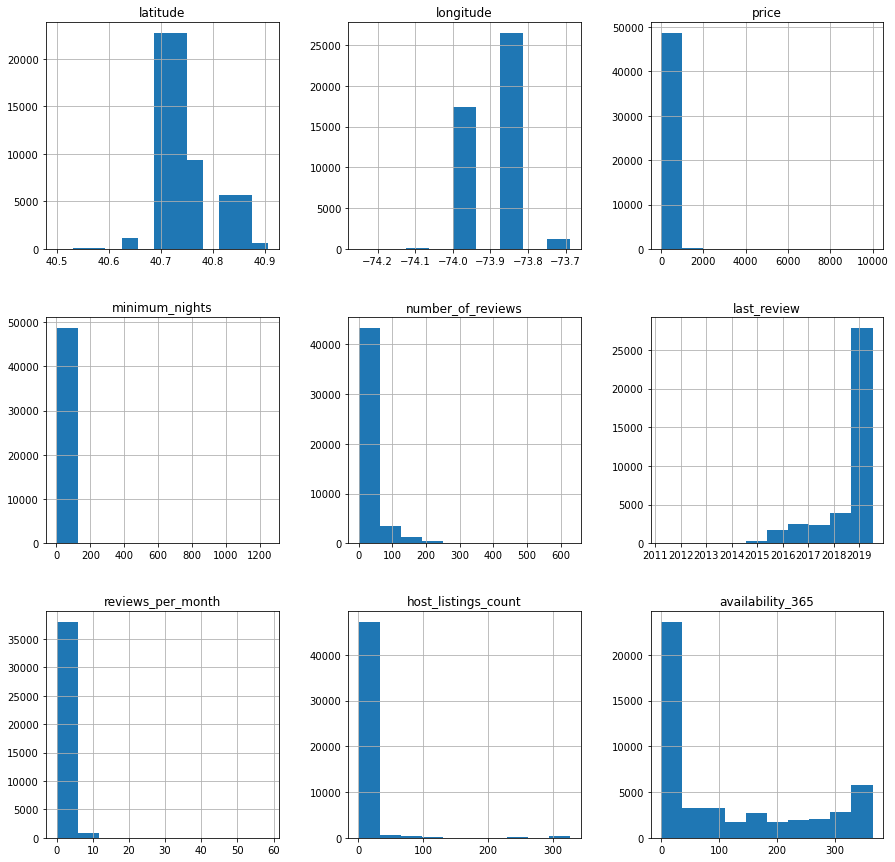

In [25]:
airbnb.hist(figsize = (15,15))
plt.show()

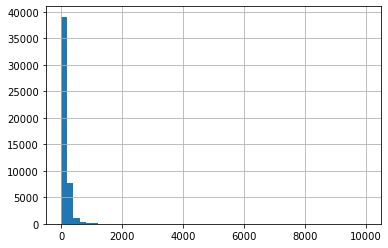

In [26]:
airbnb['price'].hist(bins = 50)
plt.show()

In [27]:
airbnb[['minimum_nights','name','price']].sort_values(by = 'price', ascending = False).head(10)

minimum_nights                                               name  \
9151              100                Furnished room in Astoria apartment   
17692               5    Luxury 1 bedroom apt. -stunning Manhattan views   
29238              30                                1-BR Lincoln Center   
40433              30  2br - The Heart of NYC: Manhattans Lower East ...   
12342              99                Quiet, Clean, Lit @ LES & Chinatown   
6530                5                                 Spanish Harlem Apt   
30268              30  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   
4377                1                                      Film Location   
29662               1          East 72nd Townhouse by (Hidden by Airbnb)   
42523               1                70' Luxury MotorYacht on the Hudson   

       price  
9151   10000  
17692  10000  
29238  10000  
40433   9999  
12342   9999  
6530    9999  
30268   8500  
4377    8000  
29662   7703  
42523   7500

After reviewing the minimum_nights, price and name columns, it looks to me that very high prices may be unrealistic and I should remove them. I will add a new column total_price (total_price = minimum_nights x price) to decide high total_price listings.

In [28]:
airbnb['total_price'] = airbnb['minimum_nights'] * airbnb['price']

In [29]:
airbnb[['minimum_nights','name','price','total_price']].sort_values(by = 'total_price', ascending = False).head(10)

minimum_nights                                              name  \
48043             180      Luxury TriBeCa Apartment at an amazing price   
9151              100               Furnished room in Astoria apartment   
12342              99               Quiet, Clean, Lit @ LES & Chinatown   
17811             365                      Gorgeous 2 Bedroom apartment   
44429             365                Room with sofa bed or air mattress   
43670             114  Beautiful private Brooklyn room with kitchenette   
2854             1000                                              <NA>   
13788             365                     Private Room in Williamsburg!   
38220             180           Large shared apartment in Alphabet City   
29238              30                               1-BR Lincoln Center   

       price  total_price  
48043   6500      1170000  
9151   10000      1000000  
12342   9999       989901  
17811   2350       857750  
44429   2000       730000  
43670   4200       478800  
2854     400       400000  
13788   1002       365730  
38220   1880       338400  
29238  10000       300000

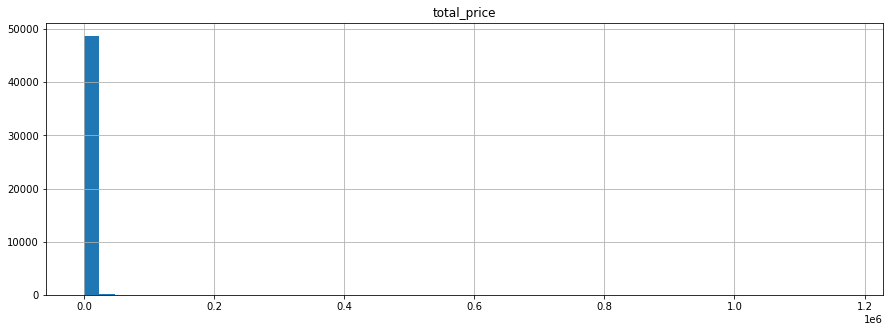

In [30]:
airbnb[['total_price']].hist(figsize = (15,5), bins = 50)
plt.show()

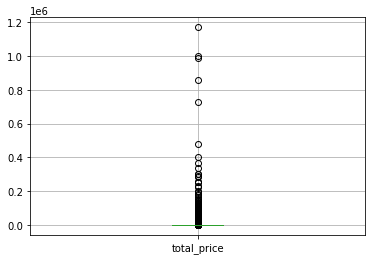

In [31]:
airbnb.boxplot('total_price')
plt.show()

In [32]:
Q1 = airbnb['total_price'].quantile(0.25)
Q3 = airbnb['total_price'].quantile(0.75)

In [33]:
print('Q1: ', Q1)
print('Q3: ', Q3)

Q1:  135.0
Q3:  734.5


In [34]:
airbnb['total_price'].describe()

count    4.889500e+04
mean     1.284433e+03
std      1.180456e+04
min      0.000000e+00
25%      1.350000e+02
50%      3.000000e+02
75%      7.345000e+02
max      1.170000e+06
Name: total_price, dtype: float64

In [35]:
airbnb[['name','total_price']].nlargest(n = 800, columns = 'total_price')

name  total_price
48043       Luxury TriBeCa Apartment at an amazing price      1170000
9151                 Furnished room in Astoria apartment      1000000
12342                Quiet, Clean, Lit @ LES & Chinatown       989901
17811                       Gorgeous 2 Bedroom apartment       857750
44429                 Room with sofa bed or air mattress       730000
...                                                  ...          ...
45569         Renovated Sutton Place Apartment- Free Gym         9000
45644                    Upper East Side Spacious STUDIO         9000
45825     Spacious 2 Bed on Park with Washer/Dryer #6113         9000
45830      Spectacular 2 Bed 2 Bath on Park Avenue #6112         9000
45837  Amazing Furnished 2 Bed on Park Ave with Gym #...         9000

[800 rows x 2 columns]

In [36]:
airbnb.loc[airbnb['total_price'] > 10000, ['name', 'room_type', 'minimum_nights', 'total_price']].sort_values(
    by = 'total_price', ascending = True)

name        room_type  \
38688  Airy Times Sq 1BR w/ Indoor pool, Gym + Doorma...  Entire home/apt   
43351  Central Herald Sq.1BR w/ Roofdeck, Gym next to...  Entire home/apt   
38782  Smart Studio in Heart of West Village w/ Doorm...  Entire home/apt   
38683  Swanky 1BR in Central Chelsea w/ Garden by Blu...  Entire home/apt   
10398                  NYC High End 2BR Midtown West Apt  Entire home/apt   
...                                                  ...              ...   
44429                 Room with sofa bed or air mattress     Private room   
17811                       Gorgeous 2 Bedroom apartment  Entire home/apt   
12342                Quiet, Clean, Lit @ LES & Chinatown     Private room   
9151                 Furnished room in Astoria apartment     Private room   
48043       Luxury TriBeCa Apartment at an amazing price  Entire home/apt   

       minimum_nights  total_price  
38688              30        10020  
43351              30        10020  
38782              30        10020  
38683              30        10020  
10398              30        10050  
...               ...          ...  
44429             365       730000  
17811             365       857750  
12342              99       989901  
9151              100      1000000  
48043             180      1170000  

[616 rows x 4 columns]

In [37]:
airbnb.loc[airbnb['minimum_nights'] > 30, ['name', 'room_type', 'minimum_nights', 'total_price']].sort_values(
    by = 'minimum_nights', ascending = True)

name        room_type  \
36539  Jul Discount! Beautiful Apartment for 3 in NYC  Entire home/apt   
13502               Cozy 1-Bd, Bushwick (L/M/J train)  Entire home/apt   
30628         Spacious shared room in modern Bed-Stuy      Shared room   
5845                          Location Little Marcela     Private room   
21335           Spectacular one bedroom Close to Park  Entire home/apt   
...                                               ...              ...   
13404              Historic Designer 2 Bed. Apartment  Entire home/apt   
26341                 Beautiful place in Brooklyn! #2     Private room   
38664                    Shared Studio (females only)      Shared room   
2854                                             <NA>  Entire home/apt   
5767                 Prime W. Village location 1 bdrm  Entire home/apt   

       minimum_nights  total_price  
36539              31         6200  
13502              31         2480  
30628              31          992  
5845               31         1209  
21335              31         4340  
...               ...          ...  
13404             999        98901  
26341             999        78921  
38664             999       109890  
2854             1000       400000  
5767             1250       225000  

[747 rows x 4 columns]

Airbnb is mainly for vacation rental properties. I believe paying morethan 10,000 for vacation rent is too much so I will remove all the listings with the 'total_price' of morethan $10,000.

I also think that a vacation of morethan 30 days doesn't sound realistic. People go for a vacation for a few days to a few weeks. That said, I will remove all the listings with the 'minimum_nights' of morethan 30 days.

In [38]:
airbnb = airbnb.loc[airbnb['total_price'] < 10000]

In [39]:
airbnb = airbnb.loc[airbnb['minimum_nights'] < 30]

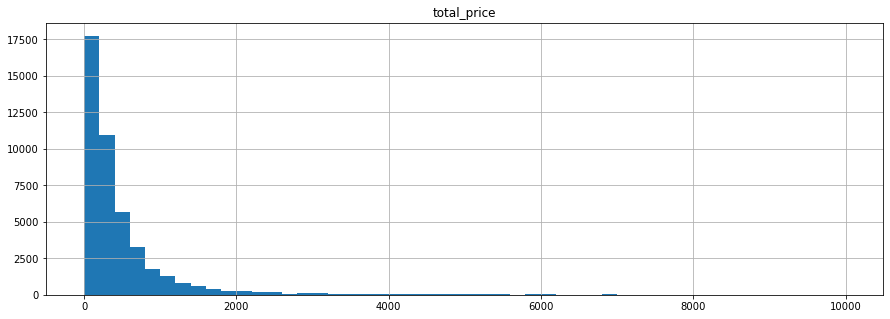

In [40]:
airbnb[['total_price']].hist(figsize = (15,5), bins = 50)
plt.show()

In [41]:
# airbnb.loc[(airbnb['total_price'] > 1000) & (airbnb['minimum_nights'] == 2), 
#           ['name', 'room_type', 'minimum_nights', 'total_price']].sort_values(
#    by = 'total_price', ascending = True)

The histogram is still very skewed even after removing the unrealistic listings. To further investigate, I am reviewing the data below.

In [42]:
airbnb.loc[airbnb['total_price'] > 5000, ['name', 'room_type', 'price', 'minimum_nights', 'total_price']].sort_values(
    by = 'minimum_nights', ascending = True).head(15)

name        room_type  \
15560                 Luxury townhouse Greenwich Village  Entire home/apt   
4377                                       Film Location  Entire home/apt   
42523                70' Luxury MotorYacht on the Hudson  Entire home/apt   
3720                 SuperBowl Penthouse Loft 3,000 sqft  Entire home/apt   
3774                    SUPER BOWL Brooklyn Duplex Apt!!  Entire home/apt   
29664          Park Avenue Mansion by (Hidden by Airbnb)  Entire home/apt   
44034                   3000 sq ft daylight photo studio  Entire home/apt   
45666                               Gem of east Flatbush     Private room   
29662          East 72nd Townhouse by (Hidden by Airbnb)  Entire home/apt   
30824  Designer's Beautiful 2BR Apartment in NOLITA/SOHO  Entire home/apt   
38358          Massive Loft in the Heart of Union square  Entire home/apt   
14380             Mins away to Manhattan Suite Residence      Shared room   
32041  Paradise Garden, Spa, Steam & Massage Table #1...  Entire home/apt   
39846                                       CQ 1 Bedroom     Private room   
4127                    Luxury 5BR Townhouse, Upper East  Entire home/apt   

       price  minimum_nights  total_price  
15560   6000               1         6000  
4377    8000               1         8000  
42523   7500               1         7500  
3720    5250               1         5250  
3774    6500               1         6500  
29664   6419               1         6419  
44034   6800               1         6800  
45666   7500               1         7500  
29662   7703               1         7703  
30824   2990               2         5980  
38358   3000               2         6000  
14380   1800               3         5400  
32041   2500               3         7500  
39846   3000               3         9000  
4127    2300               3         6900

In [43]:
airbnb.loc[airbnb['total_price'] > 5000, ['name', 'room_type', 'price', 'minimum_nights', 'total_price']].sort_values(
    by = 'total_price', ascending = False).head(15)

name        room_type  \
1899                   Spacious Centrally Located Apt!!!     Private room   
46468          2BR LUXARY DUPLEX LOFT Downtown (Monthly)  Entire home/apt   
28937                             5th Avenue One Bedroom  Entire home/apt   
44334    Great 3 Bedroom Apartment - Incredible Location  Entire home/apt   
22172      perfect apartment in New york with 3 bedrooms      Shared room   
39846                                       CQ 1 Bedroom     Private room   
813                  Decorators 5-Star Flat West Village  Entire home/apt   
27774                        Artful loft ★ NYC ★ Chelsea  Entire home/apt   
23541                Duplex home in Historic Cobble Hill  Entire home/apt   
38293      Sonder | 180 Water | Incredible 2BR + Rooftop  Entire home/apt   
45160     Sonder | The Nash | Sleek 2BR + Fitness Center  Entire home/apt   
45935        Sonder | 180 Water | Pleasant 2BR + Rooftop  Entire home/apt   
14530     Family friendly, amazing garden in Cobble hill  Entire home/apt   
1008   Family friendly,  steps to subway, large garde...  Entire home/apt   
35442   Sonder | 180 Water | Sophisticated 2BR + Rooftop  Entire home/apt   

       price  minimum_nights  total_price  
1899     999              10         9990  
46468    350              28         9800  
28937    500              19         9500  
44334    380              25         9500  
22172    337              27         9099  
39846   3000               3         9000  
813      450              20         9000  
27774    750              12         9000  
23541    424              21         8904  
38293    302              29         8758  
45160    302              29         8758  
45935    302              29         8758  
14530    300              29         8700  
1008     300              29         8700  
35442    299              29         8671

I reviewed the data for a total_price of morethan $5000. The data shows that the total_price is higher for luxury house, yacht, penthouse, mansion, prime location or prime event such as SUPER BOWL. The total_price is also higher for the minimum_nights having higher # of minimum nights. I would consider these listings as realistic and would keep them for my analysis.

Checking if there is any listing with zero total_price.

In [44]:
airbnb.loc[airbnb['total_price'] == 0, ['name', 'room_type', 'price', 'minimum_nights', 
                                        'total_price']].sort_values(by = 'total_price', ascending = True).head(15)

name        room_type  \
23161  Huge Brooklyn Brownstone Living, Close to it all.     Private room   
25433      ★Hostel Style Room | Ideal Traveling Buddies★     Private room   
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)     Private room   
25753                    Sunny, Quiet Room in Greenpoint     Private room   
25778      Modern apartment in the heart of Williamsburg  Entire home/apt   
25794  Spacious comfortable master bedroom with nice ...     Private room   
25795  Contemporary bedroom in brownstone with nice view     Private room   
25796       Cozy yet spacious private brownstone bedroom     Private room   
26259                              the best you can find  Entire home/apt   

       price  minimum_nights  total_price  
23161      0               4            0  
25433      0               2            0  
25634      0               2            0  
25753      0               2            0  
25778      0               5            0  
25794      0               1            0  
25795      0               1            0  
25796      0               1            0  
26259      0               3            0

There are 9 listings with zero total_price which I think is unrealistic so I will remove them. No one would rent a property for free and property with zero total_price won't add any value to my data analysis process.

In [45]:
airbnb = airbnb.loc[airbnb['total_price'] != 0]

In [46]:
airbnb.shape

(44299, 16)

In [47]:
airbnb.head(3)

id                                 name host_id neighbourhood_group  \
0  2539   Clean & quiet apt home by the park    2787            Brooklyn   
1  2595                Skylit Midtown Castle    2845           Manhattan   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !    4632           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Kensington  40.65625   -74.0000     Private room    149               1   
1       Midtown  40.75000   -74.0000  Entire home/apt    225               1   
2        Harlem  40.81250   -73.9375     Private room    150               3   

   number_of_reviews last_review  reviews_per_month  host_listings_count  \
0                  9  2018-10-19           0.209961                    6   
1                 45  2019-05-21           0.379883                    2   
2                  0         NaT                NaN                    1   

   availability_365  total_price  
0               365          149  
1               355          225  
2               365          450

This dataset had originally 48895 rows but after removing unrealistic data, I ended up with 44299 rows.

% reduction = (48895 - 44299) / 48895 = 9.40% reduction

#### Extracting date & time

For time series analysis there is only last_review column whch won't be much useful so I am adding year, month, day
and day_name columns after extracting them from the last_review column. I am also changing the data types of these
new columns.

In [48]:
airbnb['year'] = airbnb['last_review'].dt.year.astype('float16')
airbnb['month'] = airbnb['last_review'].dt.month.astype('float16')
airbnb['day'] = airbnb['last_review'].dt.day.astype('float16')
airbnb['day_name'] = airbnb['last_review'].dt.day_name().astype('string')

#### Exploring data (Exploratory Data Analysis)

Aggregating statistics  
Common steps for numerical columns (for 1 column)

In [50]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44299 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   44299 non-null  string        
 1   name                 44284 non-null  string        
 2   host_id              44299 non-null  string        
 3   neighbourhood_group  44299 non-null  string        
 4   neighbourhood        44299 non-null  string        
 5   latitude             44299 non-null  float16       
 6   longitude            44299 non-null  float16       
 7   room_type            44299 non-null  category      
 8   price                44299 non-null  int32         
 9   minimum_nights       44299 non-null  int16         
 10  number_of_reviews    44299 non-null  int16         
 11  last_review          36059 non-null  datetime64[ns]
 12  reviews_per_month    36059 non-null  float16       
 13  host_listings_count  44299 non-

In [65]:
(airbnb['minimum_nights'].value_counts(normalize = True)*100).round(2)

1     28.71
2     26.39
3     18.05
4      7.45
5      6.84
7      4.63
6      1.69
14     1.26
10     1.08
29     0.74
15     0.62
20     0.49
28     0.39
21     0.30
8      0.29
12     0.21
25     0.18
9      0.18
13     0.12
11     0.07
18     0.06
16     0.04
27     0.04
26     0.03
17     0.03
24     0.03
19     0.02
22     0.02
23     0.02
Name: minimum_nights, dtype: float64

In [54]:
airbnb['minimum_nights'].describe()

count    44299.000000
mean         3.481094
std          4.191645
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         29.000000
Name: minimum_nights, dtype: float64

In [66]:
airbnb['price'].describe()

count    44299.000000
mean       146.379218
std        187.206946
min         10.000000
25%         69.000000
50%        100.000000
75%        175.000000
max       8000.000000
Name: price, dtype: float64

In [67]:
airbnb['host_listings_count'].describe()

count    44299.000000
mean         4.495406
std         27.964620
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: host_listings_count, dtype: float64

In [68]:
(airbnb['host_listings_count'].value_counts(normalize = True)*100).round(2)

1      69.50
2      14.23
3       6.02
4       2.91
5       1.67
6       1.00
7       0.76
327     0.72
8       0.64
9       0.37
10      0.35
12      0.29
13      0.26
96      0.21
11      0.17
28      0.12
17      0.12
47      0.09
34      0.08
15      0.07
33      0.07
30      0.07
14      0.06
49      0.06
18      0.05
20      0.05
26      0.03
37      0.02
31      0.02
43      0.01
121     0.01
Name: host_listings_count, dtype: float64

In [69]:
airbnb['availability_365'].describe()

count    44299.000000
mean       101.296327
std        126.514259
min          0.000000
25%          0.000000
50%         30.000000
75%        188.000000
max        365.000000
Name: availability_365, dtype: float64

In [79]:
(airbnb['availability_365'].value_counts(normalize = True)*100).round(2)

0      38.50
365     2.12
1       0.85
89      0.77
364     0.75
       ...  
186     0.05
183     0.05
196     0.05
195     0.05
202     0.03
Name: availability_365, Length: 366, dtype: float64

Common steps for categorical columns (for 1 column)

In [92]:
airbnb['neighbourhood_group'].mode()

0    Brooklyn
dtype: string

In [95]:
airbnb['neighbourhood_group'].nunique()

5

In [96]:
airbnb['room_type'].value_counts()

Entire home/apt    22184
Private room       21062
Shared room         1053
Name: room_type, dtype: int64

In [97]:
airbnb['room_type'].mode()

0    Entire home/apt
Name: room_type, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [98]:
airbnb['room_type'].describe()

count               44299
unique                  3
top       Entire home/apt
freq                22184
Name: room_type, dtype: object

In [99]:
airbnb['day_name'].value_counts()

Sunday       8884
Monday       6794
Saturday     5001
Tuesday      4400
Friday       4029
Wednesday    3687
Thursday     3264
Name: day_name, dtype: Int64

Summarize multiple columns in a DF at once

In [101]:
airbnb.mean()

latitude                      inf
longitude                    -inf
price                  146.379218
minimum_nights           3.481094
number_of_reviews       24.833066
reviews_per_month        1.440430
host_listings_count      4.495406
availability_365       101.296327
total_price            488.804826
year                          inf
month                         inf
day                           inf
dtype: float64

In [102]:
airbnb.head(3)

id                                 name host_id neighbourhood_group  \
0  2539   Clean & quiet apt home by the park    2787            Brooklyn   
1  2595                Skylit Midtown Castle    2845           Manhattan   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !    4632           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Kensington  40.65625   -74.0000     Private room    149               1   
1       Midtown  40.75000   -74.0000  Entire home/apt    225               1   
2        Harlem  40.81250   -73.9375     Private room    150               3   

   number_of_reviews last_review  reviews_per_month  host_listings_count  \
0                  9  2018-10-19           0.209961                    6   
1                 45  2019-05-21           0.379883                    2   
2                  0         NaT                NaN                    1   

   availability_365  total_price    year  month   day day_name  
0               365          149  2018.0   10.0  19.0   Friday  
1               355          225  2019.0    5.0  21.0  Tuesday  
2               365          450     NaN    NaN   NaN     <NA>

In [103]:
airbnb = airbnb.astype({'year':'string'
                        })

In [105]:
airbnb.mean()

latitude                      inf
longitude                    -inf
price                  146.379218
minimum_nights           3.481094
number_of_reviews       24.833066
reviews_per_month        1.440430
host_listings_count      4.495406
availability_365       101.296327
total_price            488.804826
month                         inf
day                           inf
dtype: float64

In [110]:
airbnb.describe(include = ['object','category','bool','string'])

id            name    host_id neighbourhood_group neighbourhood  \
count   44299           44284      44299               44299         44299   
unique  44299           43463      35660                   5           221   
top      2539  Hillside Hotel  219517861            Brooklyn  Williamsburg   
freq        1              18        318               18814          3716   

              room_type    year day_name  
count             44299   36059    36059  
unique                3       9        7  
top     Entire home/apt  2019.0   Sunday  
freq              22184   23707     8884

In [118]:
airbnb[['id','name','host_id','neighbourhood_group','neighbourhood','room_type','year','day_name']].mode()[:1]

id            name    host_id neighbourhood_group neighbourhood  \
0  10000070  Hillside Hotel  219517861            Brooklyn  Williamsburg   

         room_type    year day_name  
0  Entire home/apt  2019.0   Sunday

In [123]:
airbnb[['neighbourhood']].value_counts()[:5]

neighbourhood     
Williamsburg          3716
Bedford-Stuyvesant    3454
Harlem                2467
Bushwick              2279
East Village          1706
dtype: int64

In [124]:
airbnb[['year']].value_counts()[:5]

year  
2019.0    23707
2018.0     5299
2017.0     2930
2016.0     2550
2015.0     1327
dtype: int64

In [126]:
airbnb[['name']].value_counts()[:5]

name                            
Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        14
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
dtype: int64

In [127]:
airbnb[['neighbourhood_group']].value_counts()[:5]

neighbourhood_group
Brooklyn               18814
Manhattan              18777
Queens                  5303
Bronx                   1052
Staten Island            353
dtype: int64

In [129]:
airbnb[['host_id']].value_counts()[:5]

host_id  
219517861    318
12243051      95
190921808     40
119669058     34
213781715     33
dtype: int64

In [146]:
airbnb[['host_listings_count','availability_365','neighbourhood_group','room_type']].agg(
    {'host_listings_count':['min','max','mean'],'availability_365':['min','max','mean'],
     'neighbourhood_group':'nunique','room_type':'nunique'})

host_listings_count  availability_365  neighbourhood_group  room_type
min                 1.000000          0.000000                  NaN        NaN
max               327.000000        365.000000                  NaN        NaN
mean                4.495406        101.296327                  NaN        NaN
nunique                  NaN               NaN                  5.0        3.0

In [147]:
airbnb['neighbourhood_group'].nunique()

5

In [148]:
airbnb['neighbourhood'].nunique()

221

In [149]:
airbnb[['host_listings_count','availability_365','neighbourhood_group','room_type']].agg(
    {'host_listings_count':['min','max','mean'],'availability_365':['min','max','mean'],
     'neighbourhood':'nunique','room_type':'nunique'})

KeyError: "Column(s) ['neighbourhood'] do not exist"

In [150]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44299 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   44299 non-null  string        
 1   name                 44284 non-null  string        
 2   host_id              44299 non-null  string        
 3   neighbourhood_group  44299 non-null  string        
 4   neighbourhood        44299 non-null  string        
 5   latitude             44299 non-null  float16       
 6   longitude            44299 non-null  float16       
 7   room_type            44299 non-null  category      
 8   price                44299 non-null  int32         
 9   minimum_nights       44299 non-null  int16         
 10  number_of_reviews    44299 non-null  int16         
 11  last_review          36059 non-null  datetime64[ns]
 12  reviews_per_month    36059 non-null  float16       
 13  host_listings_count  44299 non-

In [154]:
airbnb.groupby(by = 'neighbourhood_group').groups.keys()

dict_keys(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])

In [156]:
airbnb.groupby(by = 'room_type').groups.keys()

dict_keys(['Entire home/apt', 'Private room', 'Shared room'])

In [175]:
airbnb.groupby(by = 'neighbourhood_group').get_group('Staten Island')

id                                               name    host_id  \
169       42882                          New York room with a view     185978   
249       62452                     A SpeciaL!! Private Room in NY     303939   
250       62461                        B NYC Staten Alternative...     303939   
251       62787                        C Private Room By The Ferry     303939   
256       63320                 D Private Che@p Room 2 Explore NYC     303939   
...         ...                                                ...        ...   
48401  36237529            Beautiful Cozy Room, 20mn to FREE ferry  272557707   
48441  36267546                              A Home Away From Home  233485864   
48533  36310353  Staten Island Resort minutes from ferry! Amazi...   28586423   
48649  36355110     PRIVATE ROOM IN STATEN ISLAND -FOR LADIES ONLY  201187671   
48799  36438336                                    Seas The Moment  211644523   

      neighbourhood_group   neighbourhood  latitude  longitude  \
169         Staten Island      St. George  40.65625   -74.0625   
249         Staten Island   Tompkinsville  40.62500   -74.0625   
250         Staten Island   Tompkinsville  40.62500   -74.0625   
251         Staten Island   Tompkinsville  40.62500   -74.0625   
256         Staten Island   Tompkinsville  40.62500   -74.0625   
...                   ...             ...       ...        ...   
48401       Staten Island        Rosebank  40.59375   -74.0625   
48441       Staten Island  New Dorp Beach  40.56250   -74.1250   
48533       Staten Island       Stapleton  40.62500   -74.0625   
48649       Staten Island     Shore Acres  40.62500   -74.0625   
48799       Staten Island     Great Kills  40.53125   -74.1250   

             room_type  price  minimum_nights  number_of_reviews last_review  \
169       Private room     70               2                166  2019-06-13   
249       Private room     36               2                193  2019-06-25   
250       Private room     37               2                147  2019-06-10   
251       Private room     37               2                177  2019-07-02   
256       Private room     36               2                333  2019-07-02   
...                ...    ...             ...                ...         ...   
48401     Private room     65               1                  1  2019-07-05   
48441     Private room     40               1                  0         NaT   
48533  Entire home/apt    450               5                  0         NaT   
48649     Private room     54               4                  0         NaT   
48799     Private room    235               1                  1  2019-07-07   

       reviews_per_month  host_listings_count  availability_365  total_price  \
169             1.660156                    1               312          140   
249             1.849609                    6               360           72   
250             1.440430                    6                 0           74   
251             1.709961                    6               320           74   
256             3.189453                    6               340           72   
...                  ...                  ...               ...          ...   
48401           1.000000                    1               179           65   
48441                NaN                    2               341           40   
48533                NaN                    1                88         2250   
48649                NaN                    1                89          216   
48799           1.000000                    1                87          235   

         year  month   day  day_name  
169    2019.0    6.0  13.0  Thursday  
249    2019.0    6.0  25.0   Tuesday  
250    2019.0    6.0  10.0    Monday  
251    2019.0    7.0   2.0   Tuesday  
256    2019.0    7.0   2.0   Tuesday  
...       ...    ...   ...       ...  
48401  2019.0    7.0   5.0    Friday  
48441    <NA>

In [187]:
airbnb.sort_values(by = ['price','total_price'], ascending = [False,True]).groupby(by = 'neighbourhood_group').first()

id                                       name  \
neighbourhood_group                                                        
Bronx                19698169                    "The luxury of Comfort"   
Brooklyn              2953058                              Film Location   
Manhattan            22779726  East 72nd Townhouse by (Hidden by Airbnb)   
Queens               35706068                           wait until later   
Staten Island        18051877                    Victorian Film location   

                       host_id     neighbourhood  latitude  longitude  \
neighbourhood_group                                                     
Bronx                131826530         Riverdale  40.87500   -73.9375   
Brooklyn               1177497      Clinton Hill  40.68750   -73.9375   
Manhattan            156158778   Upper East Side  40.78125   -73.9375   
Queens                35741633  Long Island City  40.75000   -73.9375   
Staten Island          2675644     Randall Manor  40.62500   -74.1250   

                           room_type  price  minimum_nights  \
neighbourhood_group                                           
Bronx                   Private room   2500               2   
Brooklyn             Entire home/apt   8000               1   
Manhattan            Entire home/apt   7703               1   
Queens               Entire home/apt   2000               1   
Staten Island        Entire home/apt   5000               1   

                     number_of_reviews last_review  reviews_per_month  \
neighbourhood_group                                                     
Bronx                                0  2017-09-03           0.040009   
Brooklyn                             1  2016-09-15           0.029999   
Manhattan                            0  2013-09-28           0.029999   
Queens                               0  2017-04-09           0.130005   
Staten Island                        0  2015-11-01           0.020004   

                     host_listings_count  availability_365  total_price  \
neighbourhood_group                                                       
Bronx                                  3               179         5000   
Brooklyn                              11               365         8000   
Manhattan                             12               146         7703   
Queens                                 1               365         2000   
Staten Island                          1               344         5000   

                       year  month   day  day_name  
neighbourhood_group                                 
Bronx                2017.0    9.0   3.0    Sunday  
Brooklyn             2016.0    9.0  15.0  Thursday  
Manhattan            2013.0    9.0  28.0  Saturday  
Queens               2017.0    4.0   9.0    Sunday  
Staten Island        2015.0   11.0   1.0    Sunday

In [197]:
airbnb.groupby(by = 'neighbourhood_group').size()

neighbourhood_group
Bronx             1052
Brooklyn         18814
Manhattan        18777
Queens            5303
Staten Island      353
dtype: int64

In [200]:
(airbnb.groupby('month').mean()).round(2)

latitude  longitude   price  minimum_nights  number_of_reviews  \
month                                                                   
1.0    40.71875   -73.9375  133.88            3.88              11.15   
2.0    40.71875   -73.9375  130.10            3.88              13.29   
3.0    40.71875   -73.9375  128.89            3.79              11.87   
4.0    40.71875   -73.9375  137.07            4.01              14.49   
5.0    40.71875   -73.9375  136.88            3.77              20.92   
6.0    40.71875   -73.9375  139.70            2.77              47.28   
7.0    40.71875   -73.9375  139.88            2.62              43.46   
8.0    40.71875   -73.9375  131.12            4.23               7.64   
9.0    40.71875   -73.9375  144.09            3.76               9.37   
10.0   40.71875   -73.9375  138.57            3.59               9.85   
11.0   40.71875   -73.9375  136.62            3.71              10.76   
12.0   40.71875   -73.9375  155.18            3.65              11.40   

       reviews_per_month  host_listings_count  availability_365  total_price  \
month                                                                          
1.0             0.379883                 1.57             51.47       509.90   
2.0             0.529785                 2.39             58.88       455.28   
3.0             0.529785                 2.51             63.29       462.73   
4.0             0.609863                 3.10             81.84       527.82   
5.0             0.910156                 5.81            120.09       499.55   
6.0             2.140625                 6.20            144.23       391.48   
7.0             2.609375                 1.89            128.44       379.13   
8.0             0.219971                 1.55             33.53       551.50   
9.0             0.270020                 1.52             55.46       497.40   
10.0            0.300049                 1.70             71.01       483.06   
11.0            0.350098                 1.73             42.57       478.45   
12.0            0.379883                 1.75             50.28       527.58   

             day  
month             
1.0     6.199219  
2.0    15.859375  
3.0    18.312500  
4.0    18.312500  
5.0    19.265625  
6.0    19.312500  
7.0     6.328125  
8.0    17.609375  
9.0    15.679688  
10.0   16.218750  
11.0   15.476562  
12.0   19.937500

In [206]:
(airbnb.groupby('neighbourhood_group').mean()).round(2)

latitude  longitude   price  minimum_nights  \
neighbourhood_group                                                
Bronx                40.84375   -73.8750   88.29            2.59   
Brooklyn             40.68750   -73.9375  122.23            3.51   
Manhattan            40.75000   -74.0000  188.03            3.70   
Queens               40.71875   -73.8750   98.30            2.87   
Staten Island        40.62500   -74.1250  113.00            2.49   

                     number_of_reviews  reviews_per_month  \
neighbourhood_group                                         
Bronx                            26.71           1.879883   
Brooklyn                         25.05           1.320312   
Manhattan                        23.16           1.360352   
Queens                           29.12           2.009766   
Staten Island                    32.11           1.910156   

                     host_listings_count  availability_365  total_price  \
neighbourhood_group                                                       
Bronx                               2.17            164.17       217.85   
Brooklyn                            1.88             93.53       408.61   
Manhattan                           7.92             92.43       649.45   
Queens                              2.27            141.25       272.46   
Staten Island                       2.34            199.45       275.24   

                        month        day  
neighbourhood_group                       
Bronx                6.078125  15.382812  
Brooklyn             6.179688  15.906250  
Manhattan            6.191406  15.796875  
Queens               6.199219  15.093750  
Staten Island        6.300781  14.601562

In [208]:
(airbnb.groupby('neighbourhood_group').mean()).round(2)

latitude  longitude   price  minimum_nights  \
neighbourhood_group                                                
Bronx                40.84375   -73.8750   88.29            2.59   
Brooklyn             40.68750   -73.9375  122.23            3.51   
Manhattan            40.75000   -74.0000  188.03            3.70   
Queens               40.71875   -73.8750   98.30            2.87   
Staten Island        40.62500   -74.1250  113.00            2.49   

                     number_of_reviews  reviews_per_month  \
neighbourhood_group                                         
Bronx                            26.71           1.879883   
Brooklyn                         25.05           1.320312   
Manhattan                        23.16           1.360352   
Queens                           29.12           2.009766   
Staten Island                    32.11           1.910156   

                     host_listings_count  availability_365  total_price  \
neighbourhood_group                                                       
Bronx                               2.17            164.17       217.85   
Brooklyn                            1.88             93.53       408.61   
Manhattan                           7.92             92.43       649.45   
Queens                              2.27            141.25       272.46   
Staten Island                       2.34            199.45       275.24   

                        month        day  
neighbourhood_group                       
Bronx                6.078125  15.382812  
Brooklyn             6.179688  15.906250  
Manhattan            6.191406  15.796875  
Queens               6.199219  15.093750  
Staten Island        6.300781  14.601562

In [223]:
airbnb.groupby('month')[['price','total_price']].mean()

price  total_price
month                         
1.0    133.881270   509.898903
2.0    130.096626   455.283742
3.0    128.890436   462.727019
4.0    137.073498   527.824034
5.0    136.884937   499.549296
6.0    139.696322   391.477011
7.0    139.884522   379.132445
8.0    131.118564   551.501355
9.0    144.090263   497.403696
10.0   138.566308   483.060932
11.0   136.623174   478.448880
12.0   155.181932   527.582183

In [224]:
airbnb.groupby('neighbourhood_group')[['price','total_price']].mean()

price  total_price
neighbourhood_group                         
Bronx                 88.285171   217.846958
Brooklyn             122.234400   408.610609
Manhattan            188.032806   649.451989
Queens                98.298510   272.462757
Staten Island        113.002833   275.240793

In [229]:
(airbnb.groupby('year')[['price','total_price']].mean()).round(2)

price  total_price
year                       
2011.0  169.00       467.71
2012.0  163.24      1241.95
2013.0  272.72       957.28
2014.0  158.03       586.19
2015.0  137.72       438.36
2016.0  138.19       432.54
2017.0  126.22       433.01
2018.0  133.98       530.73
2019.0  141.06       424.11

In [231]:
(airbnb.groupby('year')[['price','total_price']].agg(['min','max','mean'])).round(2)

price               total_price               
         min   max    mean         min   max     mean
year                                                 
2011.0    55   299  169.00          90   897   467.71
2012.0    60   700  163.24          80  5400  1241.95
2013.0    30  5000  272.72          85  5500   957.28
2014.0    29   800  158.03          30  6380   586.19
2015.0    22  2000  137.72          25  8050   438.36
2016.0    22  8000  138.19          22  9990   432.54
2017.0    10  2000  126.22          10  7500   433.01
2018.0    10  4500  133.98          10  8904   530.73
2019.0    10  7500  141.06          10  9000   424.11

In [232]:
(airbnb.groupby('day_name')[['price','total_price']].agg(['min','max','mean'])).round(2)

price               total_price              
            min   max    mean         min   max    mean
day_name                                               
Friday       12  2000  136.92          13  7200  468.16
Monday       10  2500  136.53          10  8260  420.18
Saturday     10  5000  140.28          10  8372  469.16
Sunday       10  7500  141.54          10  8700  394.92
Thursday     15  8000  140.36          15  9000  484.65
Tuesday      10  2000  135.97          10  9000  469.76
Wednesday    10  2400  137.76          10  9990  473.86

In [233]:
(airbnb.groupby('neighbourhood_group')[['price','total_price']].agg(['min','max','mean'])).round(2)

price               total_price              
                      min   max    mean         min   max    mean
neighbourhood_group                                              
Bronx                  10  2500   88.29          10  5000  217.85
Brooklyn               10  8000  122.23          10  9800  408.61
Manhattan              10  7703  188.03          10  9990  649.45
Queens                 10  2000   98.30          10  7000  272.46
Staten Island          13  5000  113.00          13  5600  275.24

In [234]:
(airbnb.groupby(['year','month'])[['price','total_price']].agg(['min','max','mean'])).round(2)

price               total_price              
               min   max    mean         min   max    mean
year   month                                              
2011.0 3.0      55    55   55.00         110   110  110.00
       4.0     250   250  250.00         750   750  750.00
       5.0     249   249  249.00         747   747  747.00
       9.0      90   140  115.00          90   280  185.00
       12.0    100   299  199.50         400   897  648.50
...            ...   ...     ...         ...   ...     ...
2019.0 3.0      25  2200  136.63          26  7105  506.15
       4.0      20  1000  143.93          25  7250  559.83
       5.0      20  2000  140.07          21  9000  521.59
       6.0      10  3613  140.70          10  8372  388.95
       7.0      10  7500  143.68          10  7532  353.53

[92 rows x 6 columns]

#### Visualization

Distribution of one feature (Viz using Pandas library)

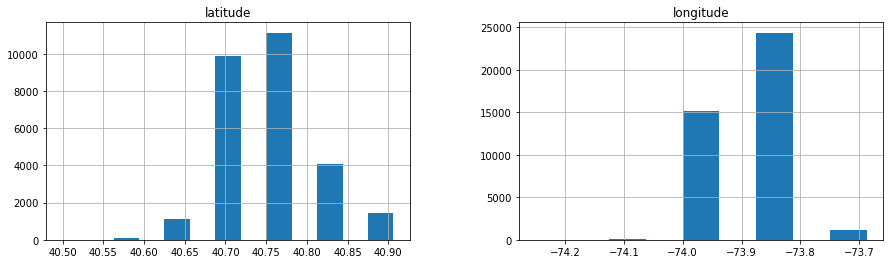

In [264]:
airbnb[['latitude','longitude']].hist(figsize = (15, 4), bins = 15)
plt.show()

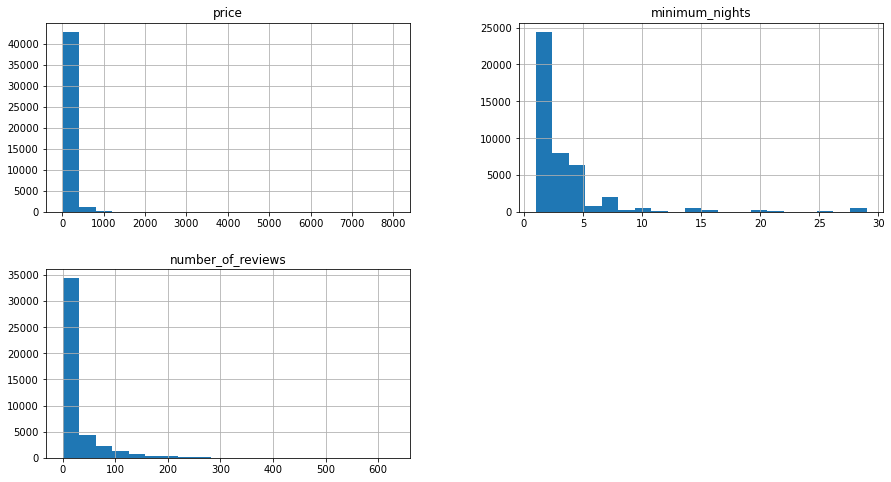

In [274]:
airbnb[['price', 'minimum_nights','number_of_reviews']].hist(figsize = (15, 8), bins = 20)
plt.show()

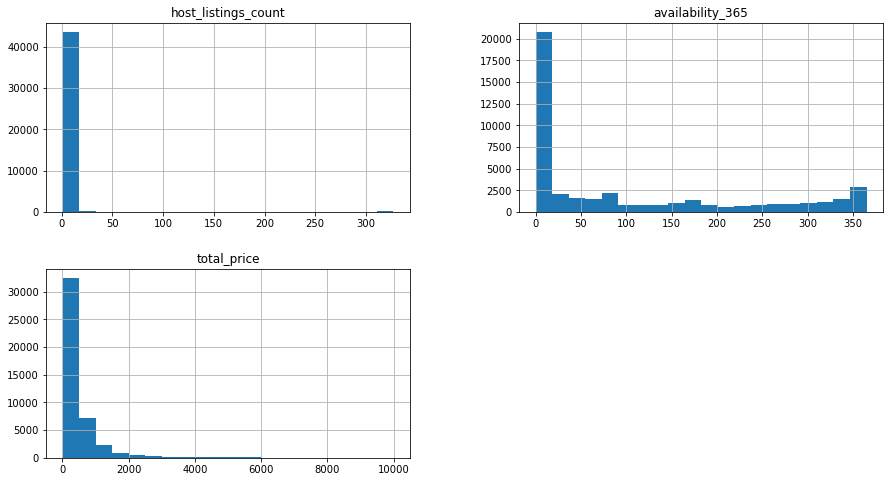

In [279]:
airbnb[['host_listings_count', 'availability_365', 'total_price']].hist(figsize = (15, 8), bins = 20)
plt.show()

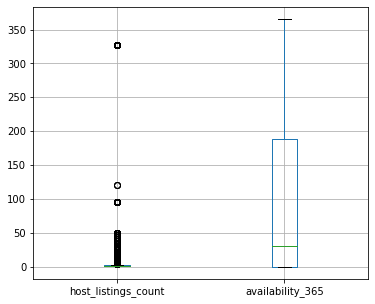

In [293]:
airbnb[['host_listings_count', 'availability_365']].boxplot(figsize = (6, 5))
plt.show()

<AxesSubplot:>

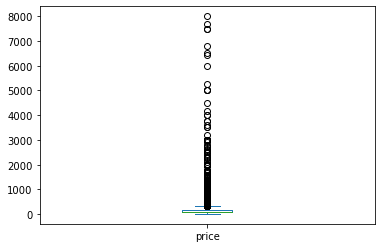

In [294]:
airbnb['price'].plot(kind = 'box')

<AxesSubplot:ylabel='Density'>

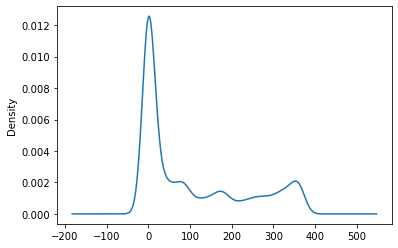

In [296]:
airbnb['availability_365'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

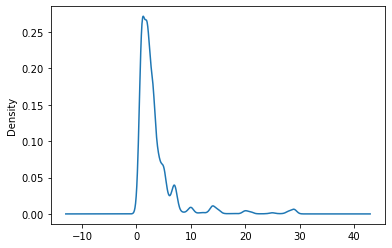

In [297]:
airbnb['minimum_nights'].plot(kind = 'kde')

Exploring categorical features

In [302]:
cat_cols = airbnb.select_dtypes(exclude = 'number').columns

In [322]:
cat_cols

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'year', 'day_name'],
      dtype='object')

In [310]:
for col in cat_cols:
    print(airbnb[col].value_counts())
    print("-----------------------------------------------------------")

2539        1
5238        1
8025        1
8024        1
3647        1
           ..
36483152    1
36484087    1
36484363    1
36484665    1
36487245    1
Name: id, Length: 44299, dtype: Int64
-----------------------------------------------------------
Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         14
Brooklyn Apartment                                   12
Loft Suite @ The Box House Hotel                     11
                                                     ..
1 Bedroom Bungalow-Rockaway-By Beach&Subway           1
Classy East Village Enclave                           1
Beautiful Brooklyn                                    1
Cozy Brooklyn Home on a Tree-lined Block              1
Trendy duplex in the very heart of Hell's Kitchen     1
Name: name, Length: 43463, dtype: Int64
-----------------------------------------------------------
219517861    318
12243051      9

In [311]:
airbnb.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'host_listings_count', 'availability_365', 'total_price', 'year',
       'month', 'day', 'day_name'],
      dtype='object')

<AxesSubplot:>

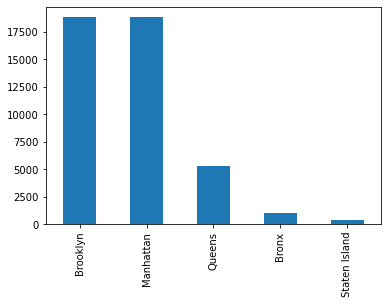

In [318]:
airbnb['neighbourhood_group'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

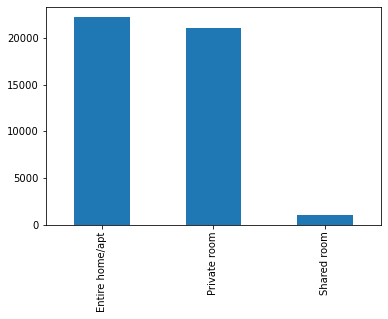

In [321]:
airbnb['room_type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

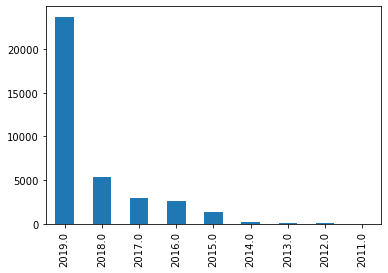

In [323]:
airbnb['year'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

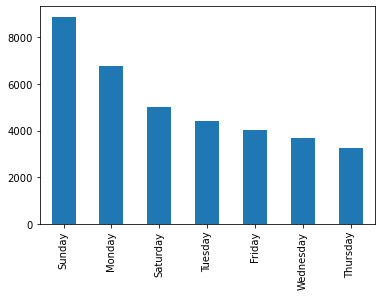

In [324]:
airbnb['day_name'].value_counts().plot(kind = 'bar')

Viz using Seaborn library

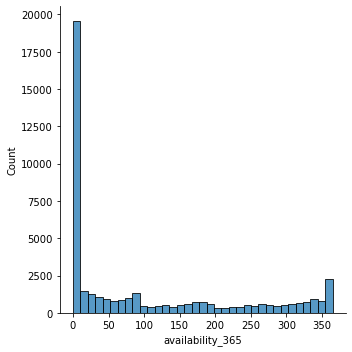

In [325]:
sns.displot(data = airbnb, x = 'availability_365')

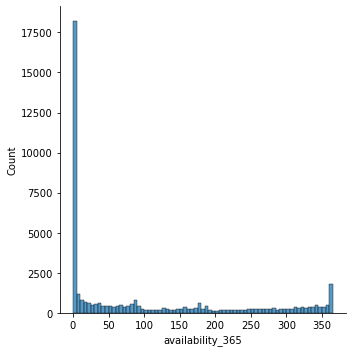

In [331]:
sns.displot(data = airbnb, x = 'availability_365', binwidth = 5)

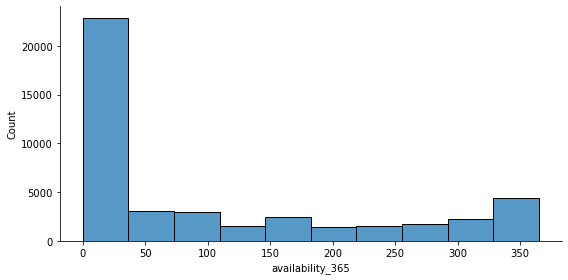

In [339]:
sns.displot(data = airbnb, x = 'availability_365', bins = 10, height = 4, aspect = 2)

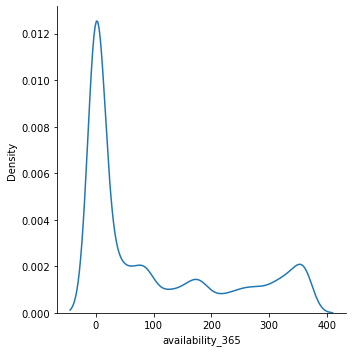

In [342]:
sns.displot(data = airbnb, x = 'availability_365', kind = 'kde')

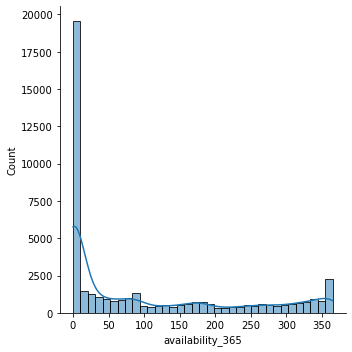

In [343]:
sns.displot(data = airbnb, x = 'availability_365', kde = True)

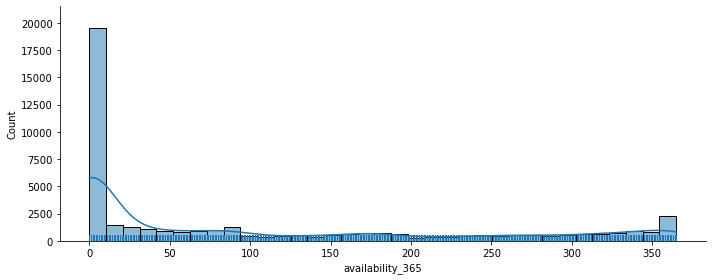

In [347]:
sns.displot(data = airbnb, x = 'availability_365', kde = True, rug = True, height = 4, aspect = 2.5)

In [348]:
cat_cols

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'year', 'day_name'],
      dtype='object')

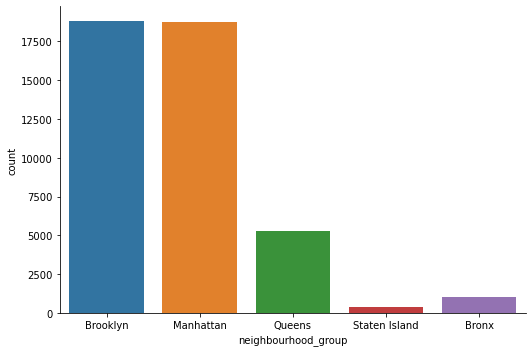

In [356]:
sns.catplot(data = airbnb, x = 'neighbourhood_group', kind = 'count', aspect = 1.5)

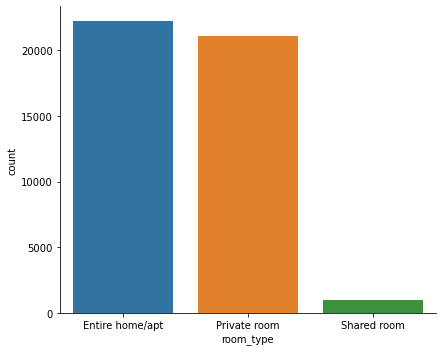

In [363]:
sns.catplot(data = airbnb, x = 'room_type', kind = 'count', aspect = 1.25)

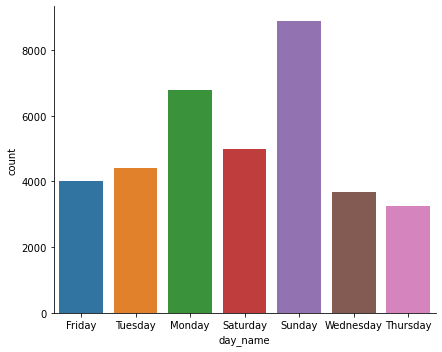

In [369]:
sns.catplot(data = airbnb, x = 'day_name', kind = 'count', aspect = 1.25)

Relationship of two features

In [370]:
num_cols = airbnb.select_dtypes(include = 'number').columns
num_cols

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'host_listings_count', 'availability_365',
       'total_price', 'month', 'day'],
      dtype='object')

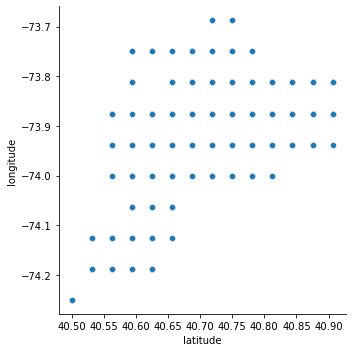

In [371]:
sns.relplot(data = airbnb, x = 'latitude', y = 'longitude', kind = 'scatter')

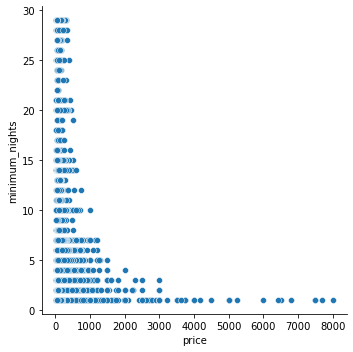

In [372]:
sns.relplot(data = airbnb, x = 'price', y = 'minimum_nights')

Scatter plot between many numerical features

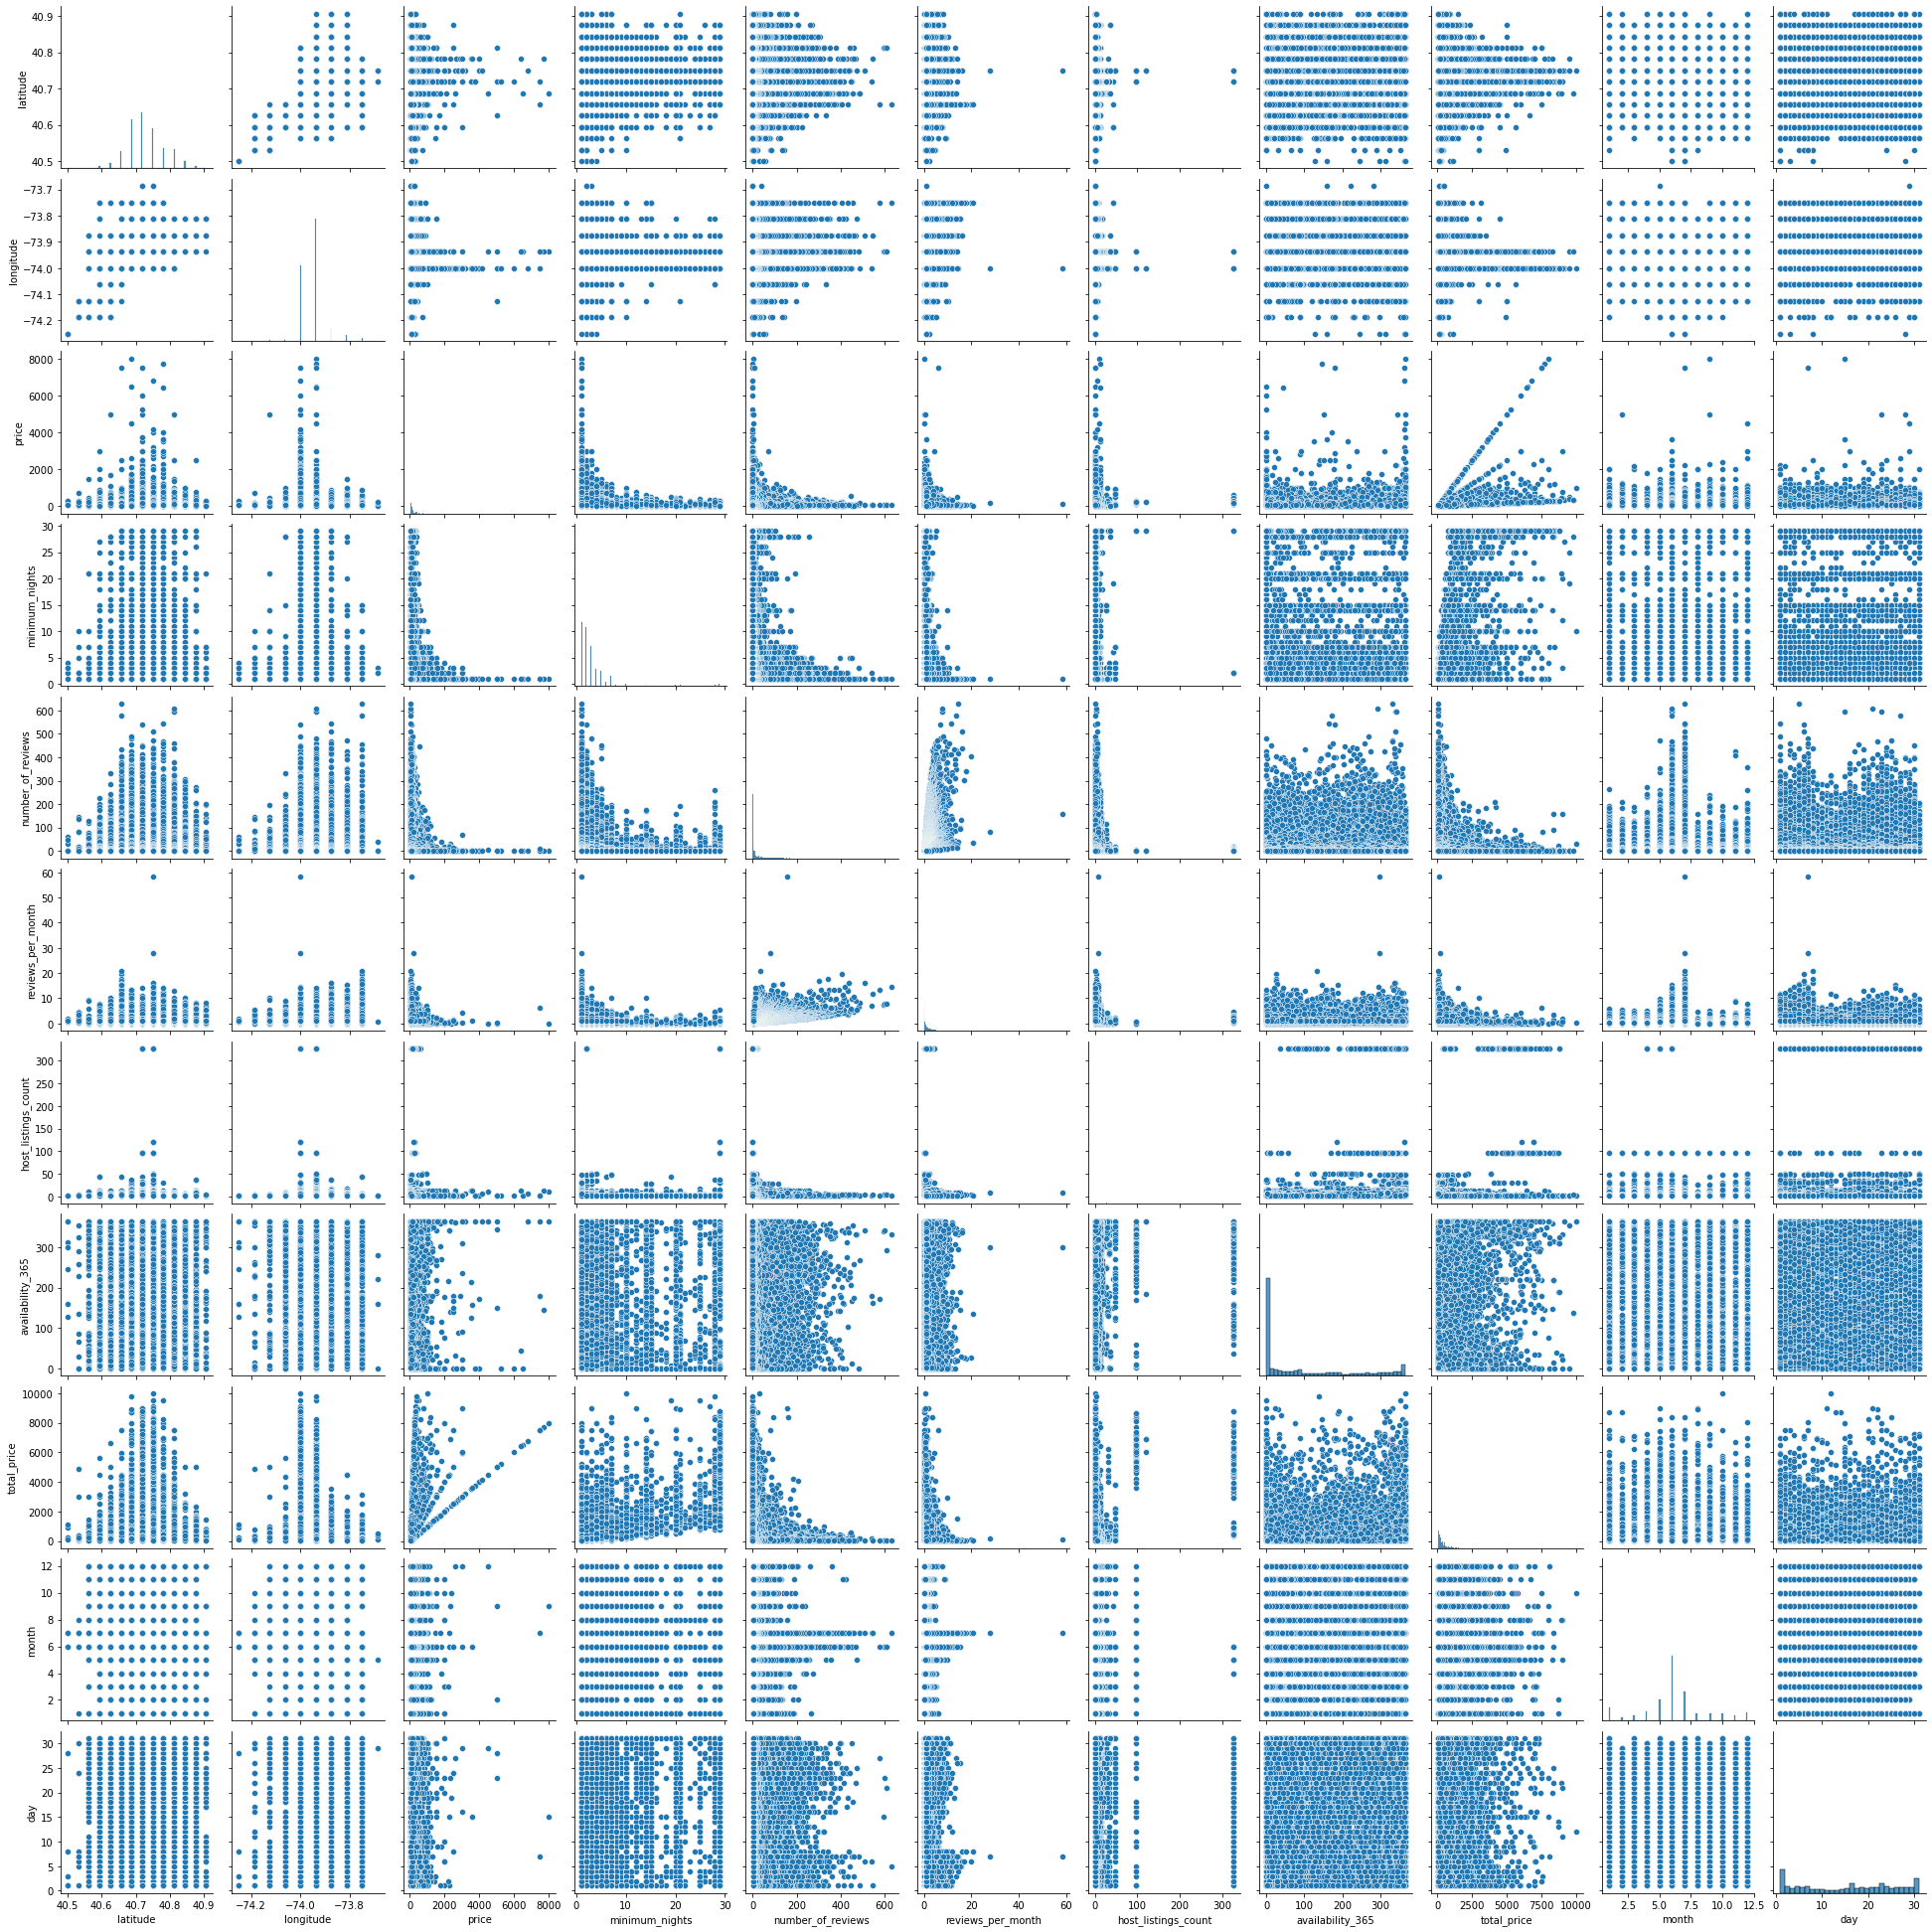

In [381]:
sns.pairplot(data = airbnb)

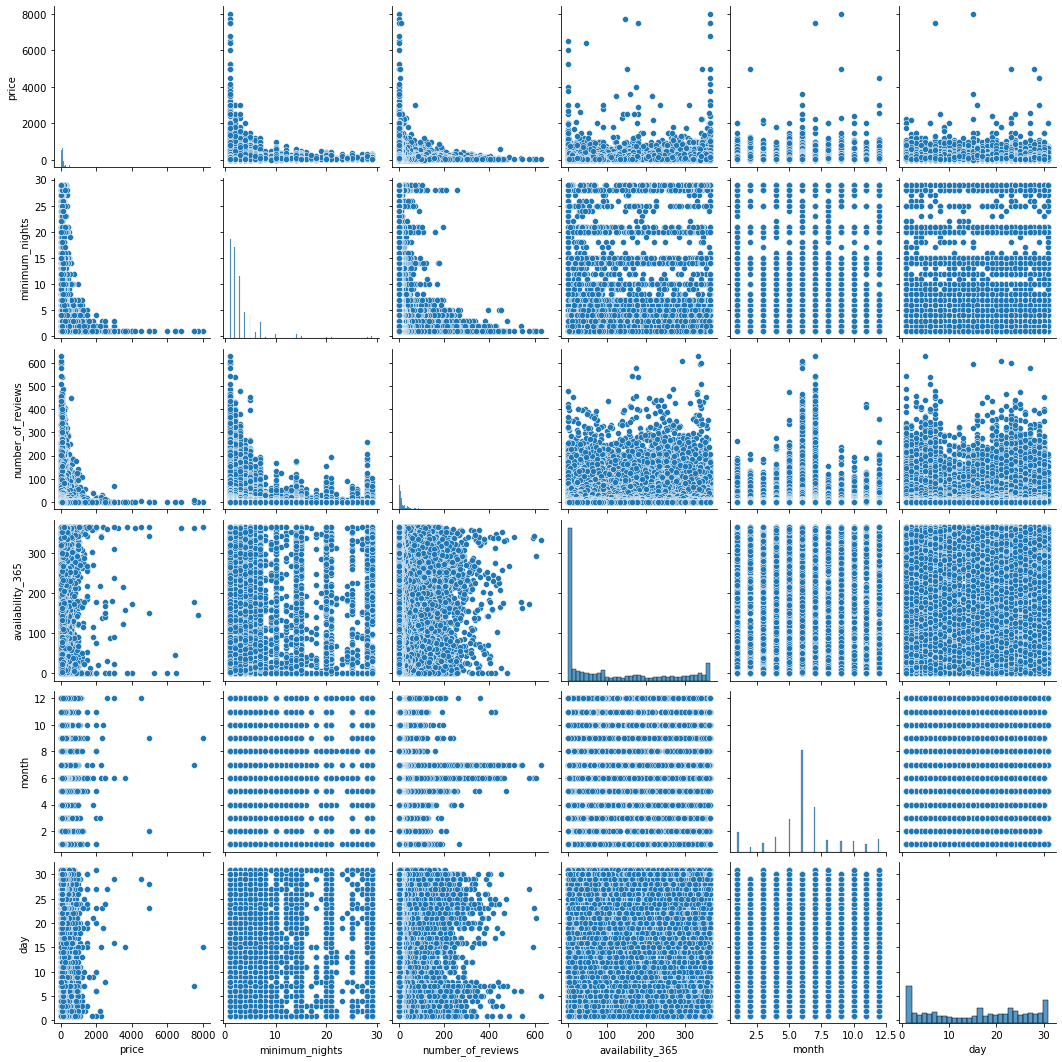

In [385]:
sns.pairplot(data = airbnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'month', 'day']])

Histogram & scatterplot together

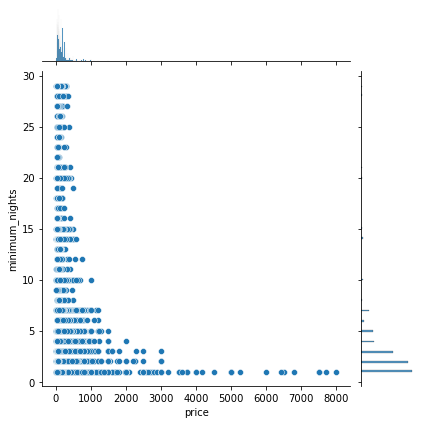

In [387]:
sns.jointplot(data = airbnb, x = 'price', y = 'minimum_nights')

Quantative measure of relationship of 2 numerical features

In [388]:
airbnb.corr()

latitude  longitude     price  minimum_nights  \
latitude             1.000000   0.087593  0.032587        0.001509   
longitude            0.087593   1.000000 -0.178387       -0.075921   
price                0.032587  -0.178387  1.000000       -0.026450   
minimum_nights       0.001509  -0.075921 -0.026450        1.000000   
number_of_reviews   -0.009703   0.048893 -0.050060       -0.119923   
reviews_per_month   -0.004928   0.125442 -0.028730       -0.209156   
host_listings_count  0.000869  -0.083232  0.047065        0.233131   
availability_365    -0.036338   0.109608  0.086638        0.010937   
total_price          0.030247  -0.192054  0.462760        0.695314   
month                0.002499  -0.001732  0.021565       -0.020980   
day                 -0.003291  -0.009270 -0.005435        0.008457   

                     number_of_reviews  reviews_per_month  \
latitude                     -0.009703          -0.004928   
longitude                     0.048893           0.125442   
price                        -0.050060          -0.028730   
minimum_nights               -0.119923          -0.209156   
number_of_reviews             1.000000           0.543408   
reviews_per_month             0.543408           1.000000   
host_listings_count          -0.039847           0.026164   
availability_365              0.227655           0.235150   
total_price                  -0.104832          -0.154516   
month                        -0.006628           0.002593   
day                           0.028759          -0.020094   

                     host_listings_count  availability_365  total_price  \
latitude                        0.000869         -0.036338     0.030247   
longitude                      -0.083232          0.109608    -0.192054   
price                           0.047065          0.086638     0.462760   
minimum_nights                  0.233131          0.010937     0.695314   
number_of_reviews              -0.039847          0.227655    -0.104832   
reviews_per_month               0.026164          0.235150    -0.154516   
host_listings_count             1.000000          0.169375     0.269791   
availability_365                0.169375          1.000000     0.078844   
total_price                     0.269791          0.078844     1.000000   
month                          -0.017708         -0.032734    -0.001943   
day                             0.009627          0.001807     0.000662   

                        month       day  
latitude             0.002499 -0.003291  
longitude           -0.001732 -0.009270  
price                0.021565 -0.005435  
minimum_nights      -0.020980  0.008457  
number_of_reviews   -0.006628  0.028759  
reviews_per_month    0.002593 -0.020094  
host_listings_count -0.017708  0.009627  
availability_365    -0.032734  0.001807  
total_price         -0.001943  0.000662  
month                1.000000  0.091357  
day                  0.091357  1.000000

Heatmap

<AxesSubplot:>

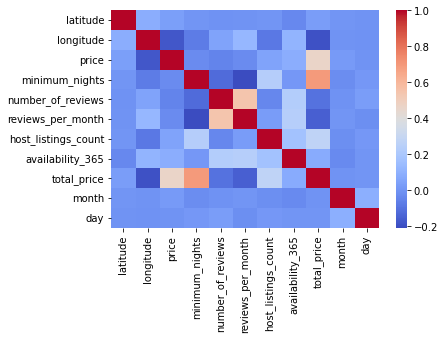

In [392]:
sns.heatmap(data = airbnb.corr(), cmap = 'coolwarm')

Relationship of 1 categorical & 1 numerical feature

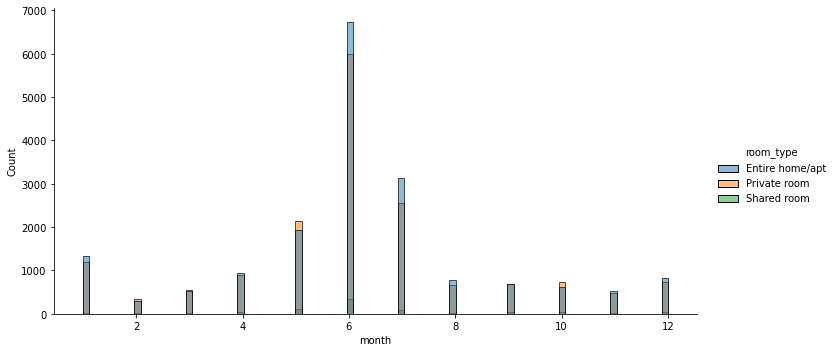

In [400]:
sns.displot(data = airbnb, x = 'month', hue = 'room_type', aspect = 2)

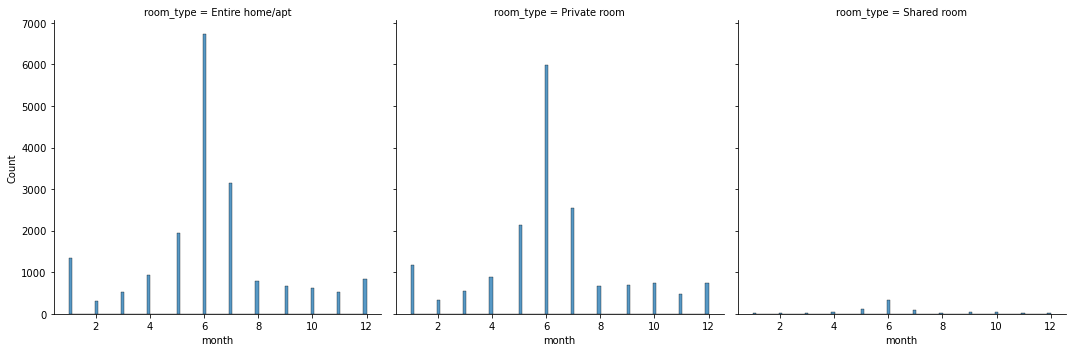

In [402]:
sns.displot(data = airbnb, x = 'month', col = 'room_type', aspect = 1)

Line chart of 1 categorical & 1 numerical feature 

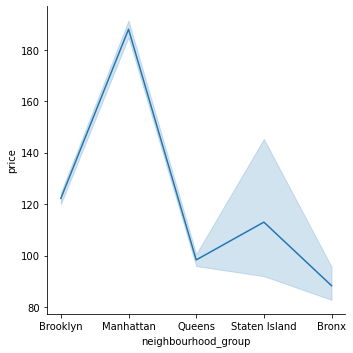

In [404]:
sns.relplot(data = airbnb, x = 'neighbourhood_group', y = 'price', kind = 'line')

In [405]:
airbnb.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             88.285171
Brooklyn         122.234400
Manhattan        188.032806
Queens            98.298510
Staten Island    113.002833
Name: price, dtype: float64

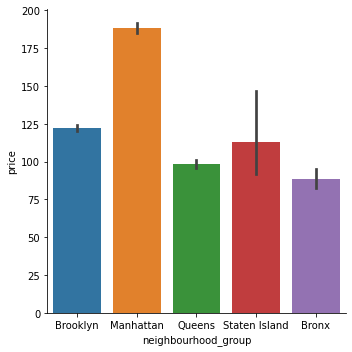

In [407]:
sns.catplot(data = airbnb, x = 'neighbourhood_group', y = 'price', kind = 'bar')

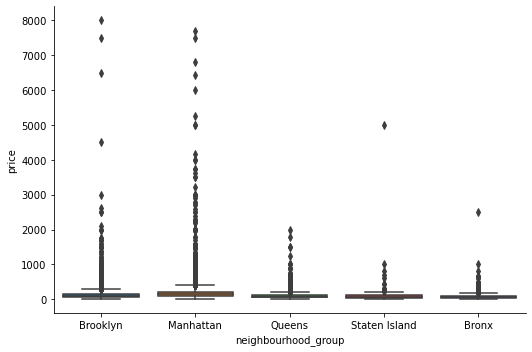

In [409]:
sns.catplot(data = airbnb, x = 'neighbourhood_group', y = 'price', kind = 'box', aspect = 1.5)

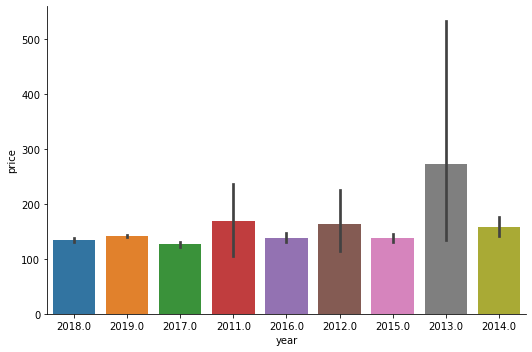

In [411]:
sns.catplot(data = airbnb, x = 'year', y = 'price', kind = 'bar', aspect = 1.5)

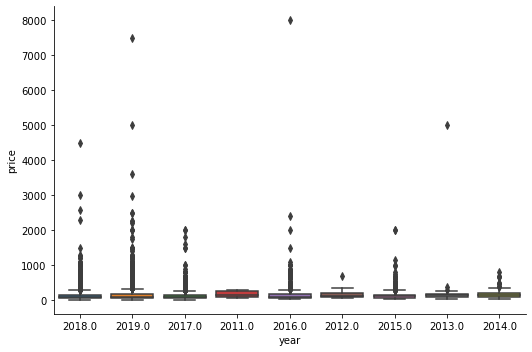

In [412]:
sns.catplot(data = airbnb, x = 'year', y = 'price', kind = 'box', aspect = 1.5)

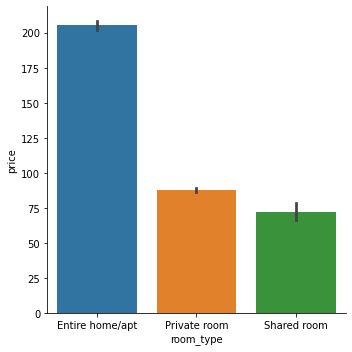

In [416]:
sns.catplot(data = airbnb, x = 'room_type', y = 'price', kind = 'bar', aspect = 1)

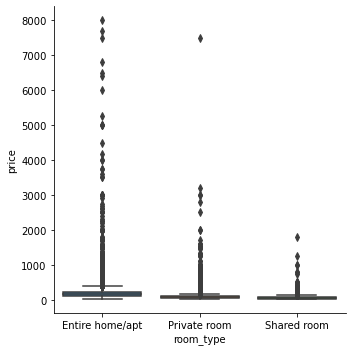

In [417]:
sns.catplot(data = airbnb, x = 'room_type', y = 'price', kind = 'box', aspect = 1)

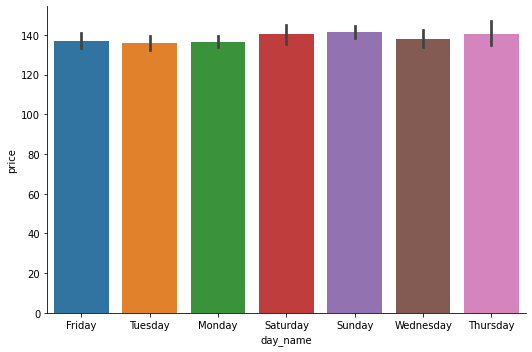

In [419]:
sns.catplot(data = airbnb, x = 'day_name', y = 'price', kind = 'bar', aspect = 1.5)

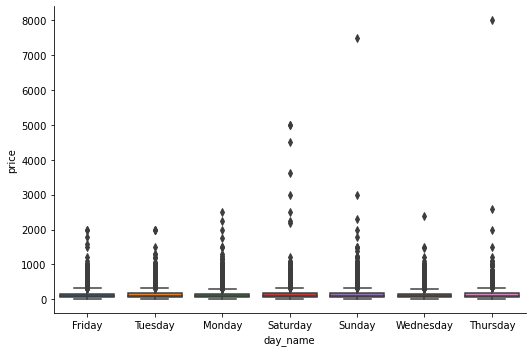

In [421]:
sns.catplot(data = airbnb, x = 'day_name', y = 'price', kind = 'box', aspect = 1.5)

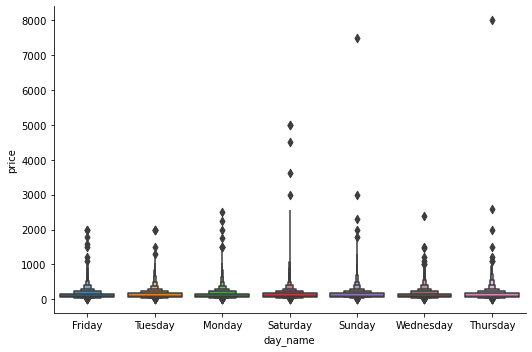

In [424]:
sns.catplot(data = airbnb, x = 'day_name', y = 'price', kind = 'boxen', aspect = 1.5)

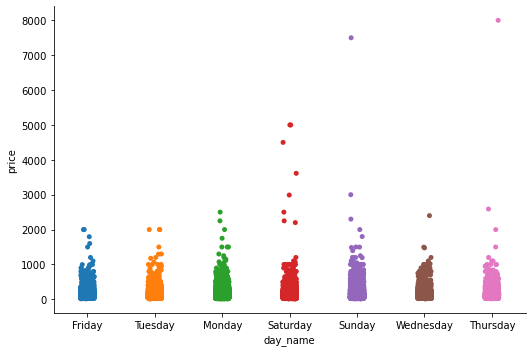

In [425]:
sns.catplot(data = airbnb, x = 'day_name', y = 'price', kind = 'strip', aspect = 1.5)

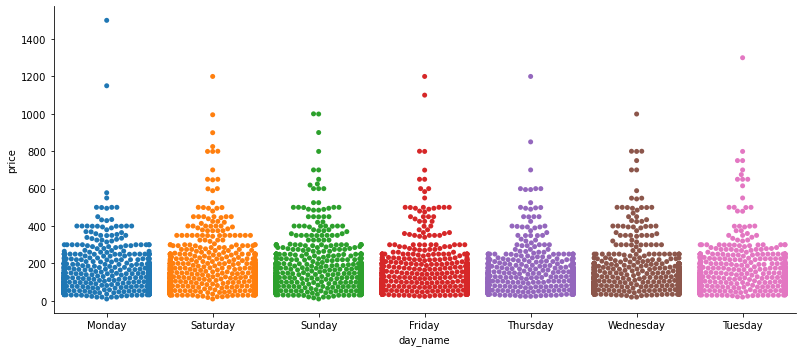

In [438]:
sns.catplot(data = airbnb[airbnb['minimum_nights'] > 4], x = 'day_name', y = 'price', kind = 'swarm', aspect = 2.25)

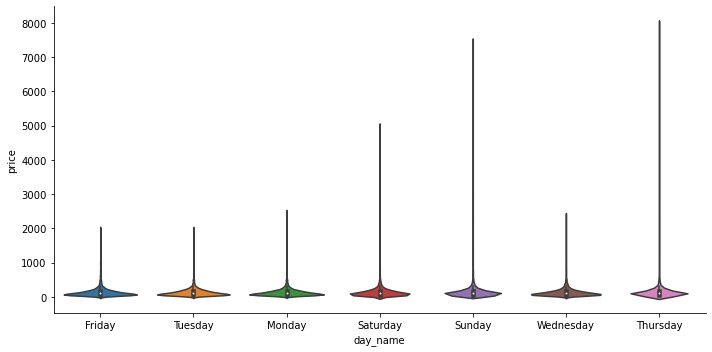

In [440]:
sns.catplot(data = airbnb, x = 'day_name', y = 'price', kind = 'violin', aspect = 2)

Visualize 2 categorical features

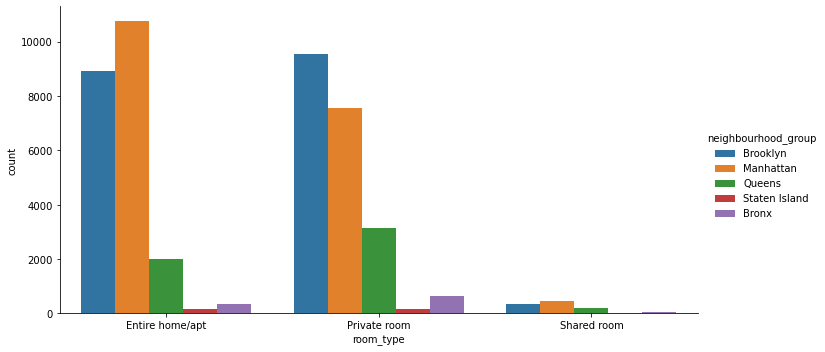

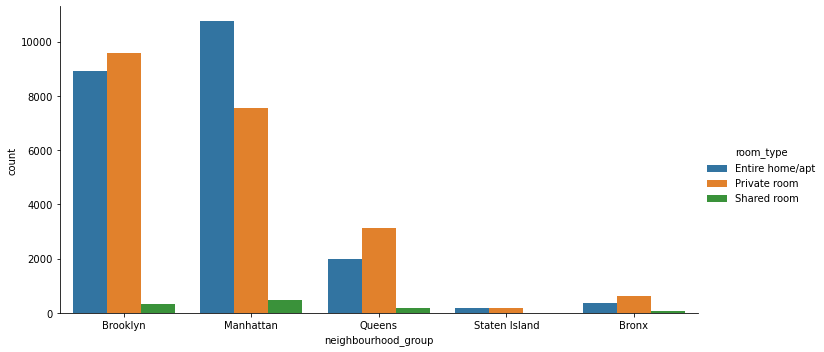

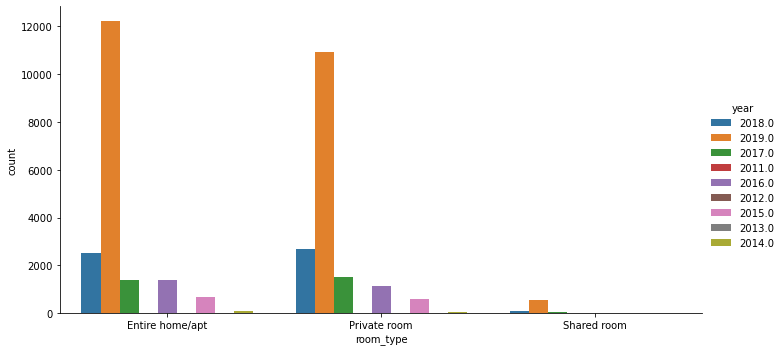

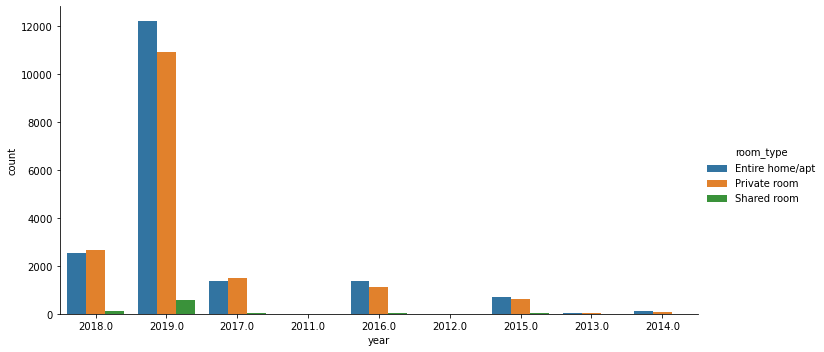

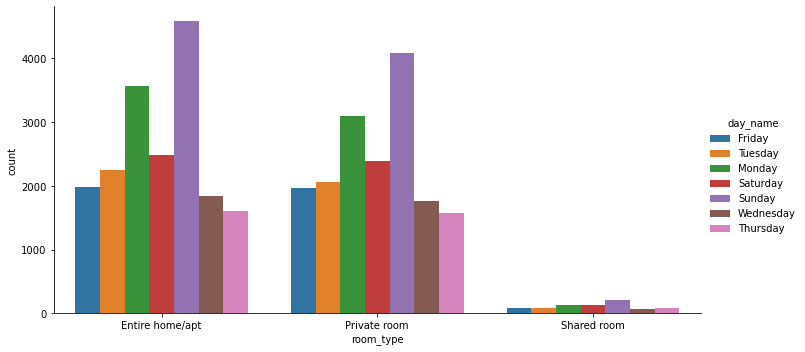

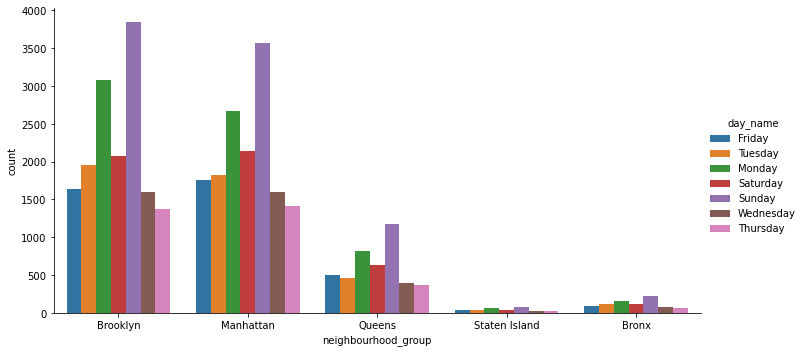

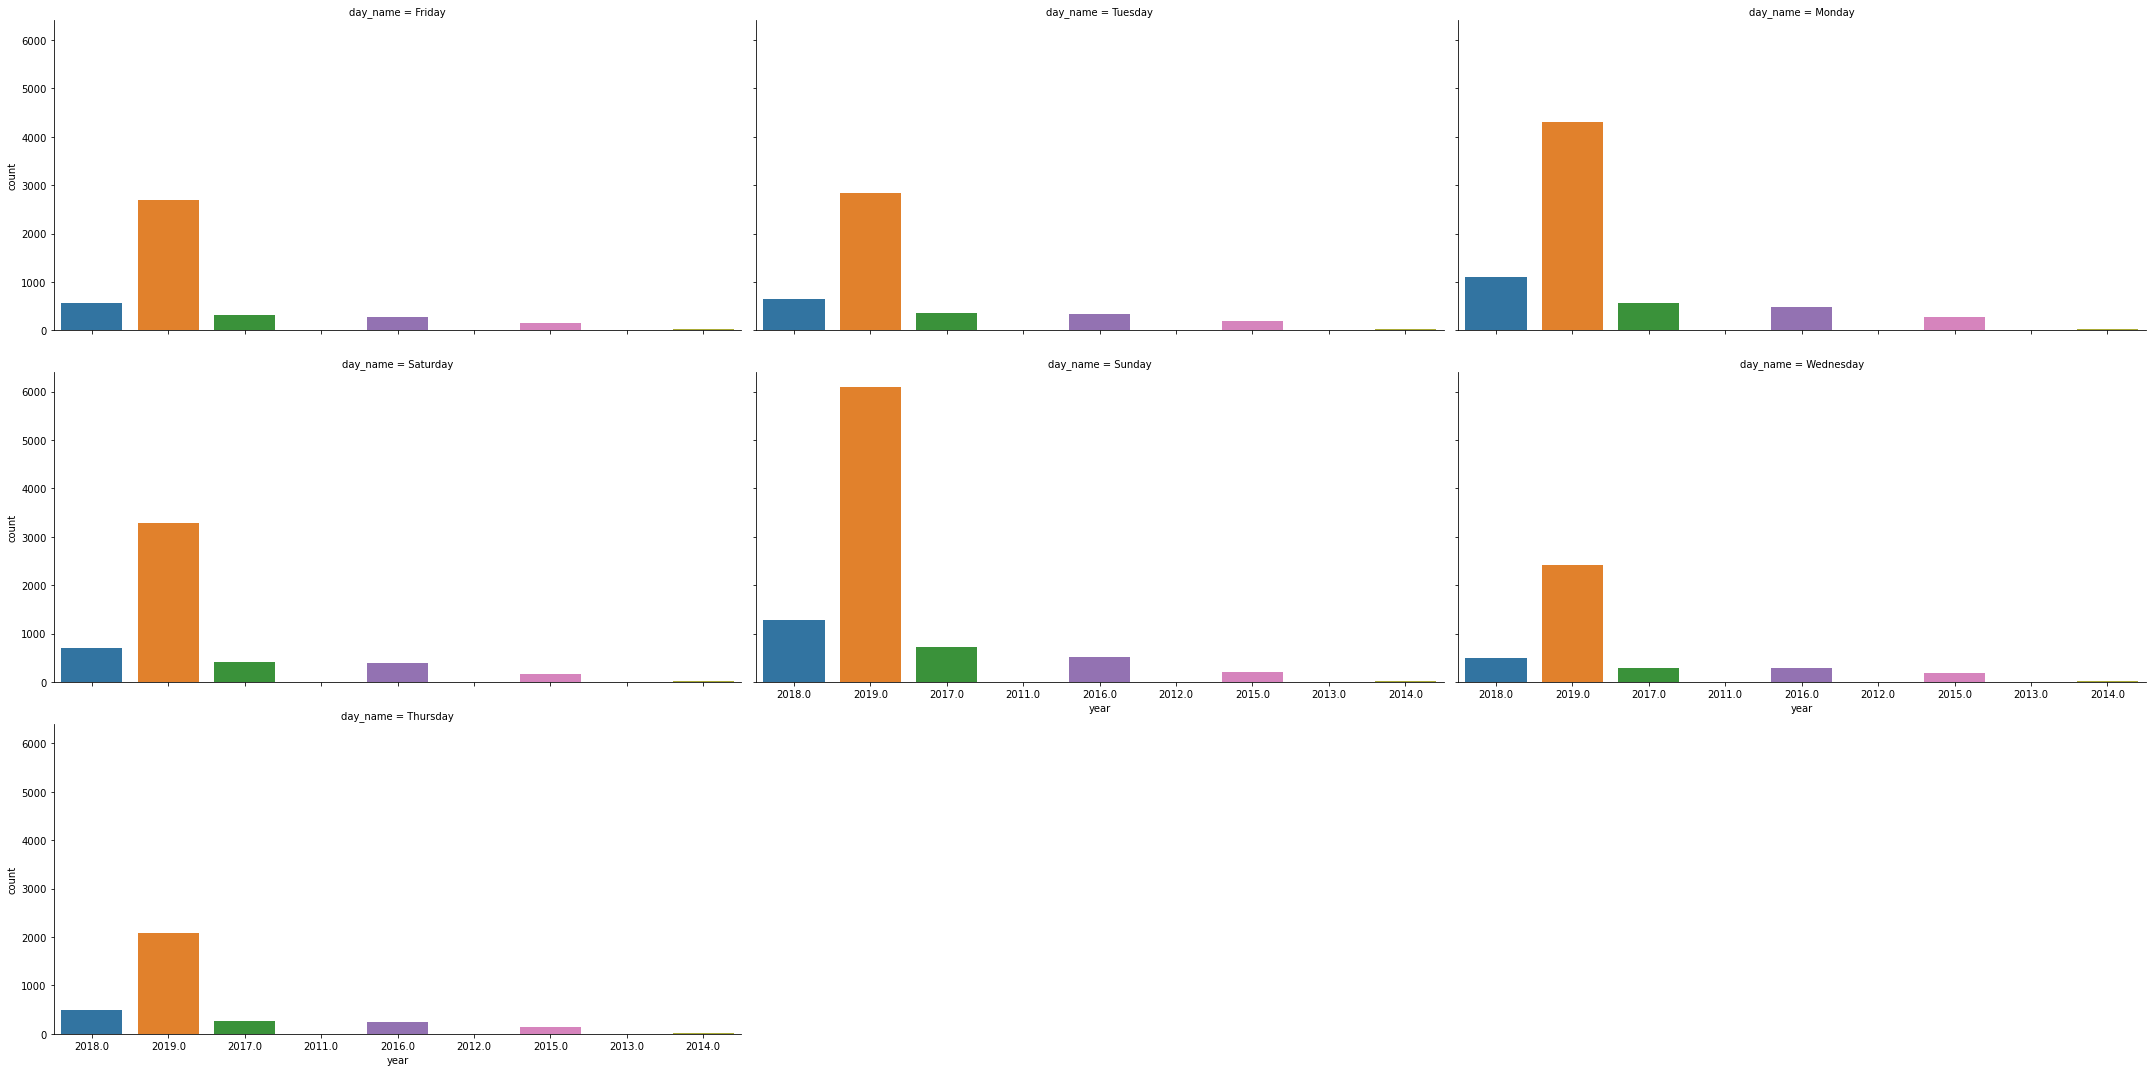

In [458]:
sns.catplot(data = airbnb, x = 'room_type', kind = 'count', hue = 'neighbourhood_group', aspect = 2)
sns.catplot(data = airbnb, x = 'neighbourhood_group', kind = 'count', hue = 'room_type', aspect = 2)
sns.catplot(data = airbnb, x = 'room_type', kind = 'count', hue = 'year', aspect = 2)
sns.catplot(data = airbnb, x = 'year', kind = 'count', hue = 'room_type', aspect = 2)
sns.catplot(data = airbnb, x = 'room_type', kind = 'count', hue = 'day_name', aspect = 2)
sns.catplot(data = airbnb, x = 'neighbourhood_group', kind = 'count', hue = 'day_name', aspect = 2)
sns.catplot(data = airbnb, x = 'year', kind = 'count', col = 'day_name', col_wrap = 3, aspect = 2)

Relationship of more than 2 features at a time

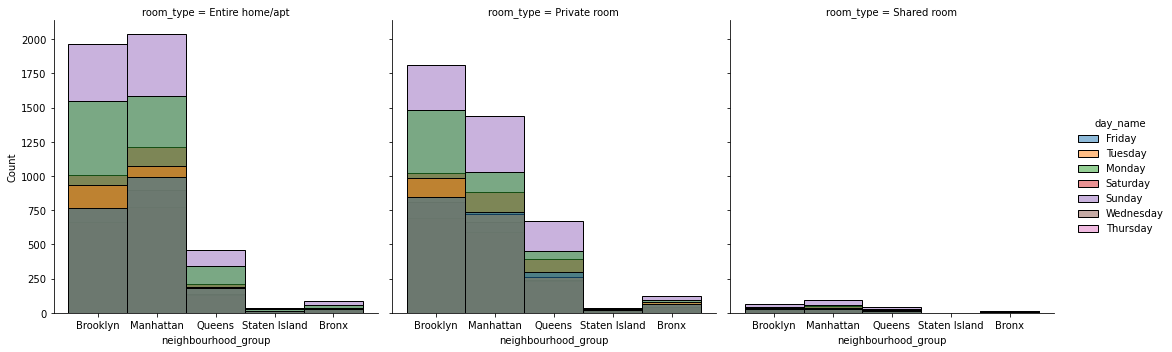

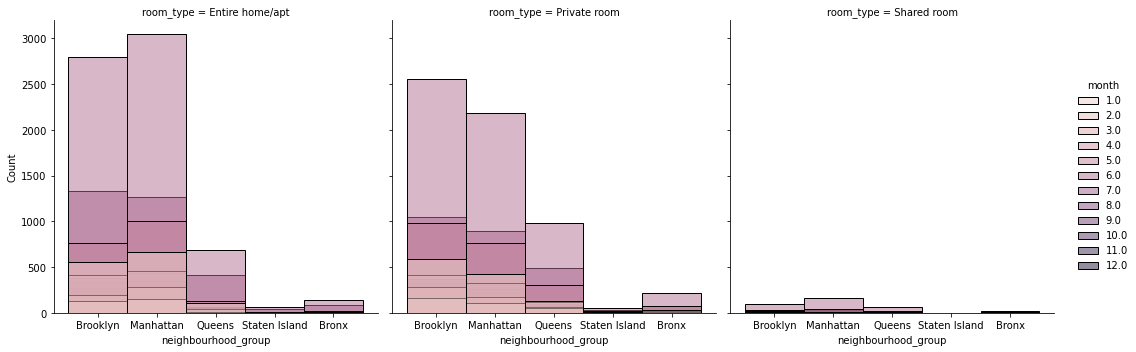

In [467]:
sns.displot(data = airbnb, x = 'neighbourhood_group', hue = 'day_name', col = 'room_type', col_wrap = 3)
sns.displot(data = airbnb, x = 'neighbourhood_group', hue = 'month', col = 'room_type', col_wrap = 3)

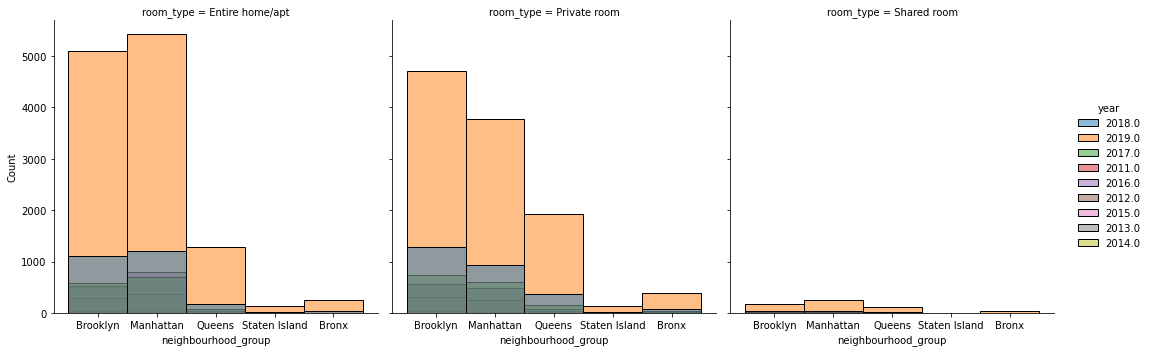

In [468]:
sns.displot(data = airbnb, x = 'neighbourhood_group', hue = 'year', col = 'room_type', col_wrap = 3)

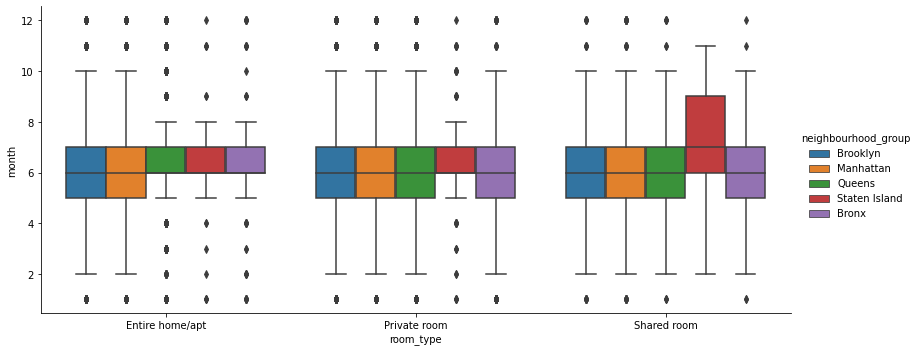

In [473]:
sns.catplot(data = airbnb, x = 'room_type', y = 'month', kind = 'box', hue = 'neighbourhood_group', aspect = 2.25)

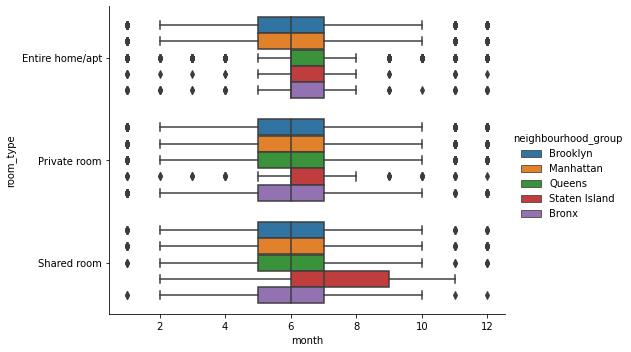

In [488]:
sns.catplot(data = airbnb, x = 'month', y = 'room_type', kind = 'box', hue = 'neighbourhood_group', aspect = 1.5)

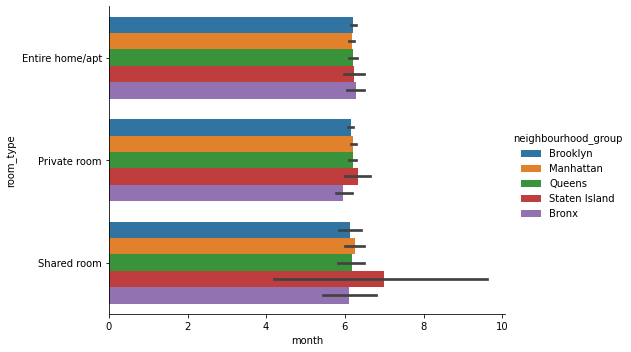

In [489]:
sns.catplot(data = airbnb, x = 'month', y = 'room_type', kind = 'bar', hue = 'neighbourhood_group', aspect = 1.5)

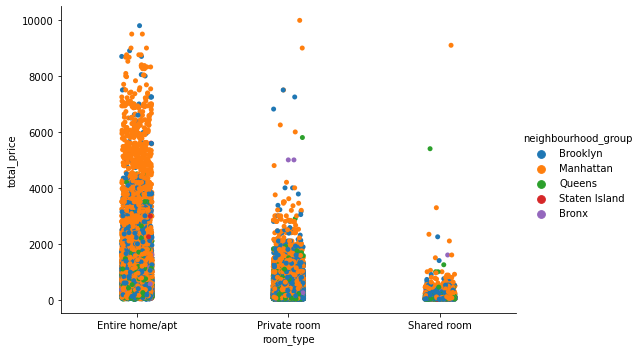

In [498]:
sns.catplot(data = airbnb, x = 'room_type', y = 'total_price', kind = 'strip', hue = 'neighbourhood_group', aspect = 1.5)

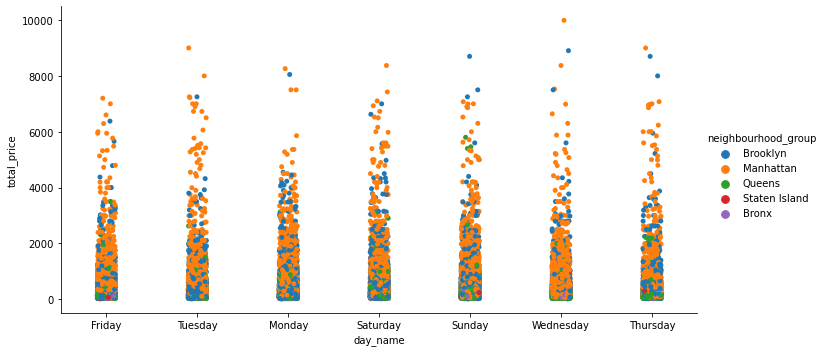

In [502]:
sns.catplot(data = airbnb, x = 'day_name', y = 'total_price', kind = 'strip', hue = 'neighbourhood_group', aspect = 2)

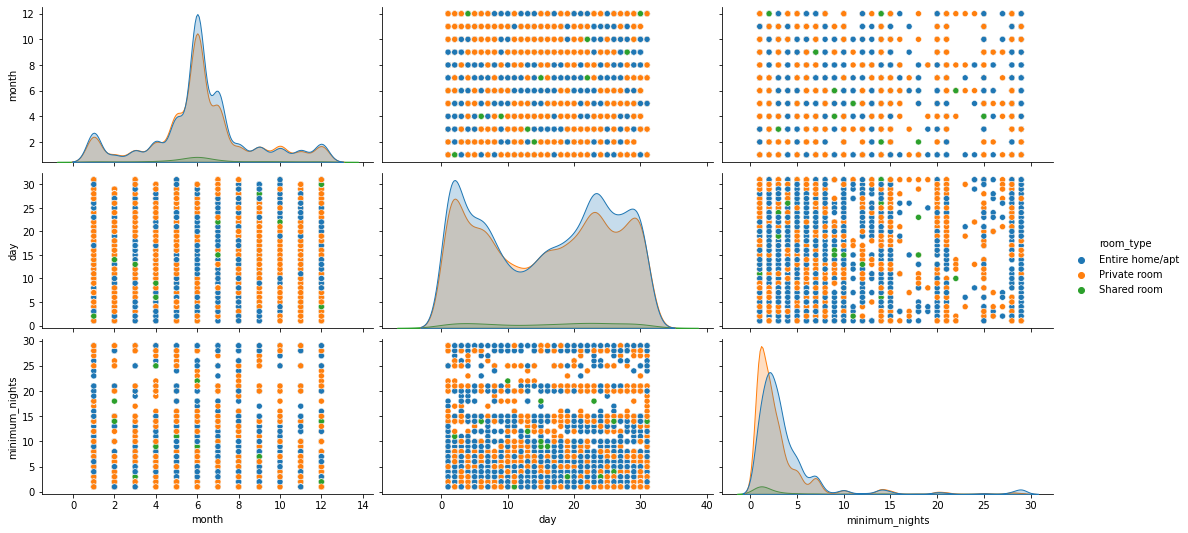

In [508]:
sns.pairplot(data = airbnb[['month','day', 'minimum_nights','room_type']], hue = 'room_type', aspect = 2)

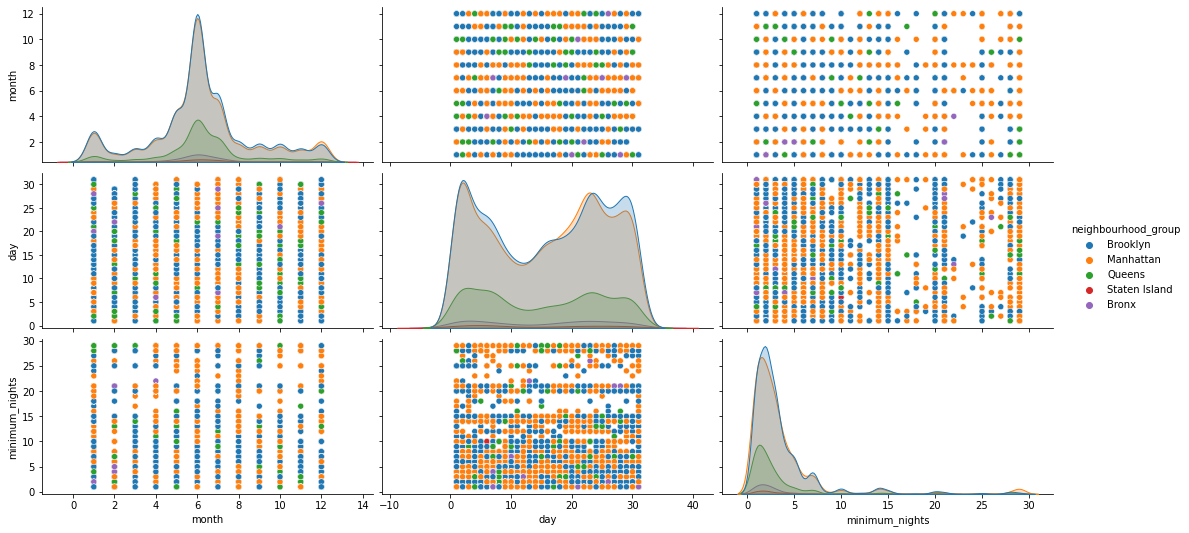

In [510]:
sns.pairplot(data = airbnb[['month','day', 'minimum_nights','neighbourhood_group']], hue = 'neighbourhood_group', aspect = 2)

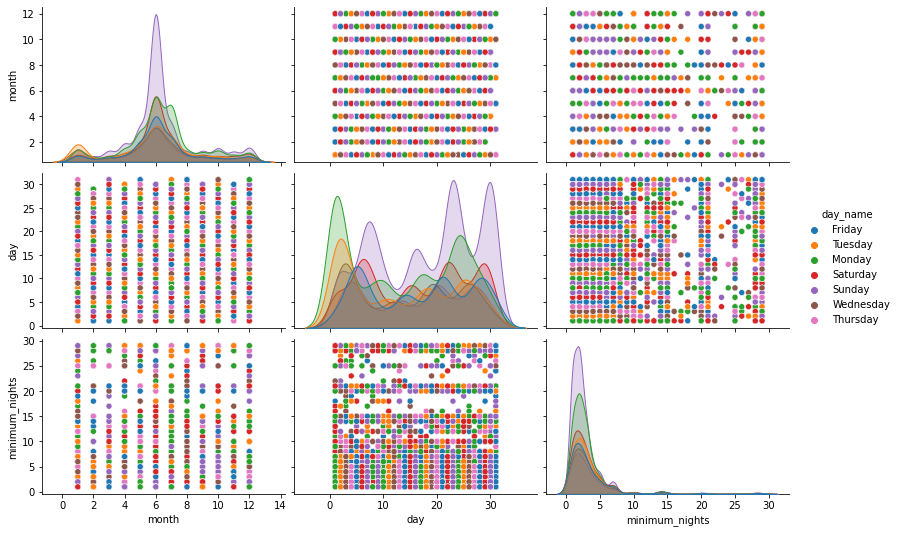

In [516]:
sns.pairplot(data = airbnb[['month','day', 'minimum_nights','day_name']], hue = 'day_name', aspect = 1.5)

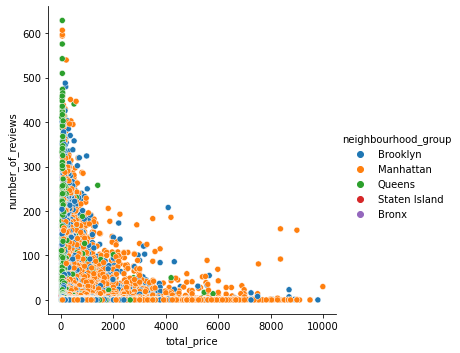

In [525]:
sns.relplot(data = airbnb, x = 'total_price', y = 'number_of_reviews', hue = 'neighbourhood_group')

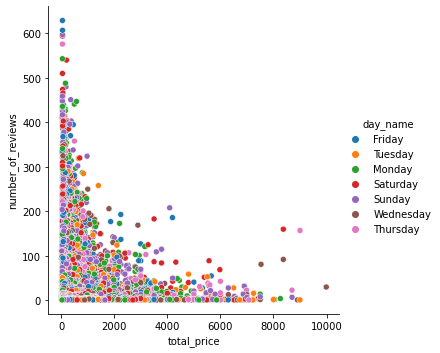

In [526]:
sns.relplot(data = airbnb, x = 'total_price', y = 'number_of_reviews', hue = 'day_name')

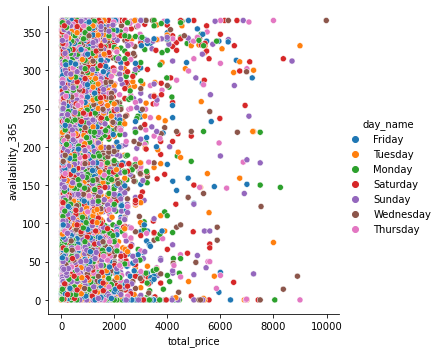

In [527]:
sns.relplot(data = airbnb, x = 'total_price', y = 'availability_365', hue = 'day_name')

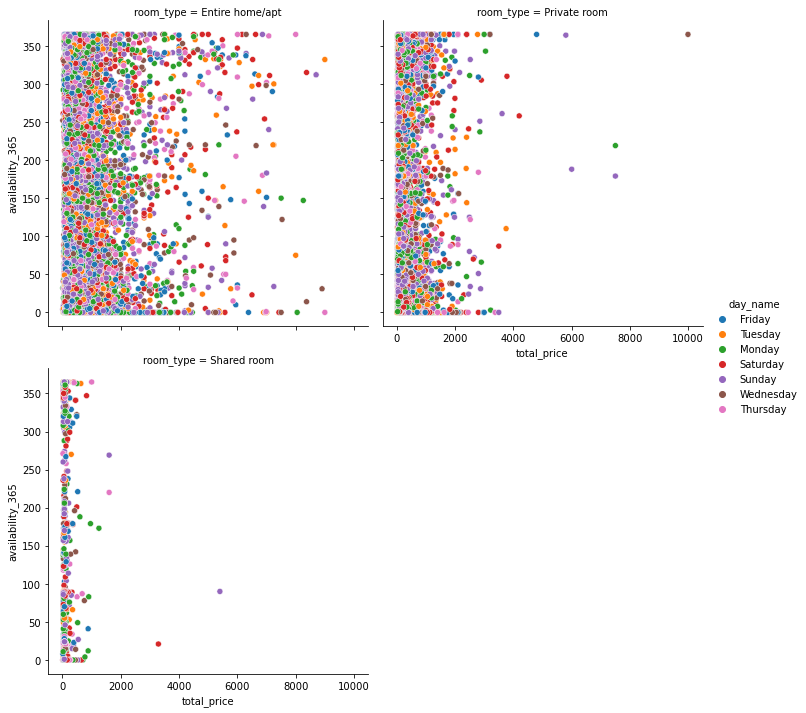

In [529]:
sns.relplot(data = airbnb, x = 'total_price', y = 'availability_365', hue = 'day_name', col = 'room_type', col_wrap = 2)

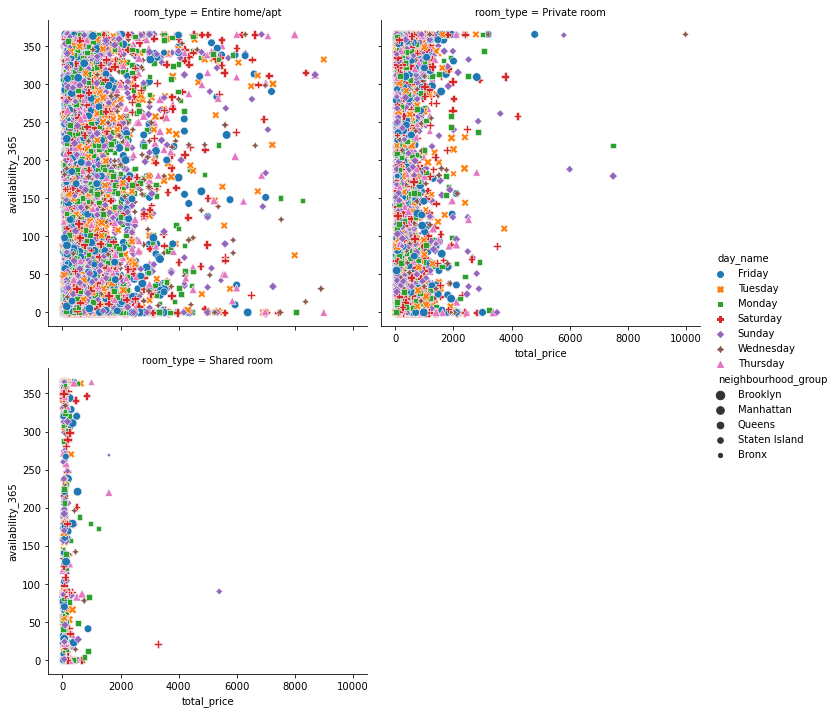

In [533]:
sns.relplot(data = airbnb, x = 'total_price', y = 'availability_365', hue = 'day_name', col = 'room_type',
            col_wrap = 2, style = 'day_name', size = 'neighbourhood_group')

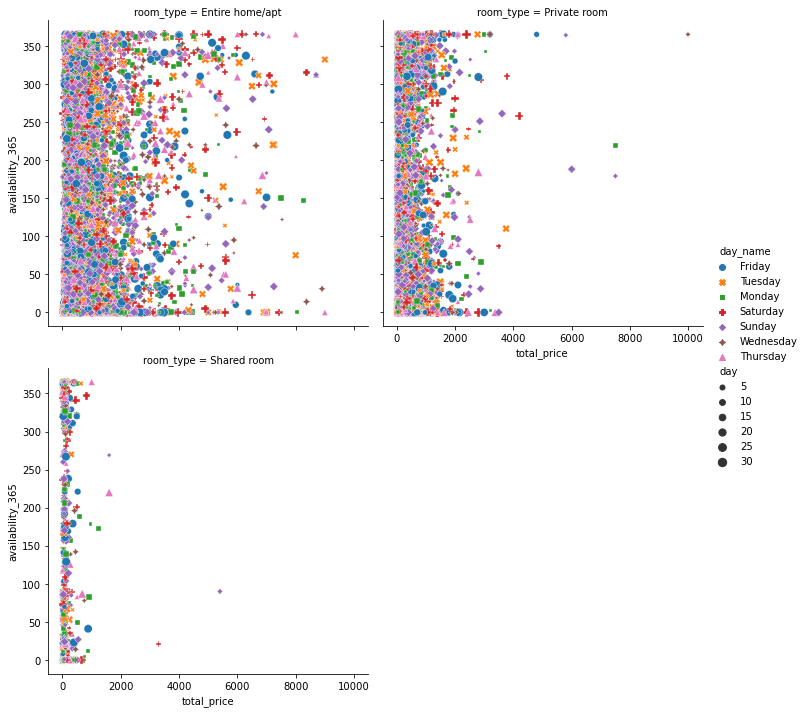

In [535]:
sns.relplot(data = airbnb, x = 'total_price', y = 'availability_365', hue = 'day_name', col = 'room_type',
            col_wrap = 2, style = 'day_name', size = 'day')

In [422]:
num_cols

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'host_listings_count', 'availability_365',
       'total_price', 'month', 'day'],
      dtype='object')

In [423]:
cat_cols

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'year', 'day_name'],
      dtype='object')

In [ ]:
# --- END ---